# <span style='color:black'><font size="6">Advacned Linear Regression (Assignment-I) </font></span>
# <span style='color:brown'><font size="5">House Price Prediction Assignment </font></span>
***
$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$
<span style='color:Black'><font size="3">Author: Shrinivas-Bhat, Batch: C44</font></span>
</span>$\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;\;$<span style='color:Black'> <font size="3">Date: 28-12-2022</font></span>

## <a id="0"> Table of Contents</a>

1.[Problem Statement](#1)
 $\;\;\;$[<font size="1.5">Click here to set lin-reg configs</font>](#1.1)

2.[Data Understanding and EDA](#2)


  $\;\;\;$[Missing Data Handling](#2.2)   
  $\;\;\;$[Exploratory Analysis for Numeric Columns](#2.3)  
  $\;\;\;$[Exploratory Analysis for Categorical Columns](#2.4)
  


3.[Data Preparations for Model Building](#3)

4.[Model Building](#4)

  $\;\;\;$[RFE based Feature Selction](#4.1) 
  
  $\;\;\;$[P-Value Optimization in RFE](#4.2) - Automatic Iterations (These are time consuming)
  
  $\;\;\;$[VIF Optimization in RFE](#4.3) -  Automatic Iterations (These are time consuming)
  
  $\;\;\;$[ Residual Analysis on Training data](#4.4) 
  
  $\;\;\;$[ Residual Analysis on Test data](#4.5) 


5.[Final Linear Regression Results](#5)

6.[ Ridge and Lasso Regression ](#6)

$\;\;\;$[ Linear Regression with Survived Parameters](#6.01) 

$\;\;\;$[ Ridge Regression](#6.1) 

$\;\;\;$[ Lasso Regression](#6.2) 

$\;\;\;$[Comparison Summary of 3 Regressions](#6.3) 

7.[ Lasso Regression with Top 5 Parameters Removed ](#7) - Assignment-II,Q-3

9.[Summary and Conclusions](#9)

9.[Assignment Part-II : Subjective Questions](#10)




***


## 1. <a id="1"> Problem Statement</a>

[Back to TOC](#0)


### Business Problem
- A US-based housing company named Surprise Housing  uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price.
- Data set has been collected from the sale of houses in Australia
- data provided as train.csv
- Identificaqtion of prospective properties to buy and enter the market

### Goal
- Build a regression model using regularisation in order to predict the actual value of prospective properties and decide on investing.
- Identify variables which are significant in predicting the price of the house
- How well those variables describe the price of the house
- Identify optimal value of ridge coefficients and lasso coefficients
- Target : SalePrice 
- Predictors : 'OverallQual','OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea' ....
 



### Dataset    Understanding
Dataset includes the following categories of features
##### Numeric features which signify areas of various section of the house,    Values ,#rooms ,Sizes  ..etc as below
-	1stFlrSF: First Floor square feet 
-	2ndFlrSF: Second floor square feet
-	LowQualFinSF: Low quality finished square feet (all floors)
-	GrLivArea: Above grade (ground) living area square feet
-	BsmtFullBath: Basement full bathrooms
-	BsmtHalfBath: Basement half bathrooms
-	FullBath: Full bathrooms above grade
-	HalfBath: Half baths above grade
-	Bedroom: Bedrooms above grade (does NOT include basement bedrooms
-	Kitchen: Kitchens above grade
-	TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
-	WoodDeckSF: Wood deck area in square feet
-	OpenPorchSF: Open porch area in square feet
-	EnclosedPorch: Enclosed porch area in square feet
-	3SsnPorch: Three season porch area in square feet
-	ScreenPorch: Screen porch area in square feet
-	PoolArea: Pool area in square feet
-	MiscVal: $Value of miscellaneous feature
-	GarageCars: Size of garage in car capacity
-	GarageArea: Size of garage in square feet
-	LotFrontage: Linear feet of street connected to property
-	LotArea: Lot size in square feet
-	MasVnrArea: Masonry veneer area in square feet
-	BsmtFinSF1/BsmtFinSF2/BsmtUnfSF: Type 1/2 finished,Unfinished square feet
-	Fireplaces: Number of fireplaces
-	TotalBsmtSF: Total square feet of basement area
##### Dataset includes the year/month features as shown below
-	MoSold: Month Sold (MM)
-	YrSold: Year Sold (YYYY)
-	GarageYrBlt: Year garage was built	
-	YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)
-	YearBuilt: Original construction date
##### Qualitative Features like
-	ExterQual: Evaluates the quality of the material on the exterior :Ex	Excellent,Gd	Good ....	
-	ExterCond: Evaluates the present condition of the material on the exterior		Ex	Excellent,Gd	Good ....
-	BsmtQual: Evaluates the height of the basementEx	Excellent,Gd	Good ....
-	BsmtCond: Evaluates the general condition of the basement
-	BsmtExposure: Refers to walkout or garden level walls
-	OverallQual: Rates the overall material and finish of the house 10	Very Excellent, 9	Excellent...	
-	OverallCond: Rates the overall condition of the house: 10	Very Excellent, 9	Excellent...		   
-	HeatingQC: Heating quality and condition: Ex	Excellent,Gd	Good ....
-	GarageQual: Garage quality : Ex	Excellent,Gd	Good ....
-	GarageCond: Garage condition : Ex	Excellent,Gd	Good .... 
-	BsmtFinType1,BsmtFinType2: Rating of basement finished area
-	KitchenQual: Kitchen quality
-	FireplaceQu: Fireplace quality
-	PoolQC: Pool quality
-	Fence: Fence quality (GdPrv(Good),MnPrv(Minimum)...)
-	Electrical: Electrical system SBrkr	Standard Circuit Breakers & Romex, FuseA/FuseB..(Clasification based on A/Qualitative rating)
-	MiscFeature: Miscellaneous feature not covered in other categories		Elev	Elevator...  
##### Property facilities and Functional   Classification Features like	   
-	MSSubClass: Identifies the type of dwelling involved in the sale.20	1-STORY 1946 & NEWER ALL STYLES,30	1-STORY 1945 & OLDER ....
-	Street: Type of road access to property : Grvl,Paved   ..	
-	Alley: Type of alley access to property: Grvl,Paved ..     
-	LotShape: General shape of property : Reg(Regular) , IR1 (Slightly irregular) ...
-	LandContour: Flatness of the property Lvl..,Bnk(Banked) ..
-	Utilities: Type of utilities available		Allpub (All Public Utility),NoSewr Elect/Gas and Water (Septictank)...
-	CentralAir: Central air conditioning	
-	Heating: Type of heating ( Floor	Floor Furnace   GasA	Gas forced warm air furnace..)
-	RoofStyle: Type of roof
-	LotConfig: Lot configuration Flat,Gable
-	LandSlope: Slope of property (GTentle,Moderate Slope..)
-	BldgType: Type of dwelling	(1Fam,2FmCon,...)
-	HouseStyle: Style of dwelling	 (1Story,..)
-	Exterior1st,Exterior2nd: Exterior covering on house: AsbShng	Asbestos Shingles   AsphShn	Asphalt Shingles...
-	RoofMatl: Roof material :ClyTile,CompShg	Standard (Composite) Shingle...
-	MasVnrType: Masonry veneer type
-	Foundation: Type of foundation : BrkTil,CBlock(Cinder)
-	GarageType: Garage location	 :  2Types	More than one type of garage, Attchd	Attached to home	...
-	Functional: Home functionality (Assume typical unless deductions are warranted) :Typ,Min1,Min2...
-	GarageFinish: Interior finish of the garage (Fin Finished...)
-	PavedDrive: Paved driveway
##### Property Sorroundings
-	MSZoning: Identifies the general zoning classification of the sale.		A Agri,B Commercial....
-	Neighborhood: Physical locations within Ames city limits( Blmngtn	Bloomington Heights,  Blueste	Bluestem,  BrDale	Briardale...
-	Condition1: Proximity to various conditions( Artery	Adjacent to arterial street Feedr	Adjacent to feeder street	...)
-	Condition2: Proximity to various conditions (if more than one is present)( Artery	Adjacent to arterial street Feedr	Adjacent to feeder street...)
##### Property Dealings
-	SaleType: Type of sale(  WD 	Warranty Deed - Conventional  CWD	Warranty Deed - Cash...	)
-	SaleCondition: Condition of sale( Normal	Normal Sale, Abnorml	Abnormal Sale ...)



[Back to TOC](#0)

### Import various Libraries 

## Dynamic Custom Configurations

   <a id="1.1"> SET CONFIGURATIONS BELOW  </a>

- Enabling Min-MaX Scaling for Y-Axis (=1 MinMaX Scaling , =0 No Scaling) - This enables the Min-Max Scaling for Dependent variable "ScalePrice"
- Choice to treat 'yr' for one hot encoding 
- Setting up the # of Features for RFE
- For other nRFEFeatures(nRFEFeatures) # The selection/droping of features should be iteratively performed
- n_features_to_select = 600 to start the RFE Process
- ForceLasRidScale : Flag to set regularization scaling , RegularizationScale : Regularization scaling factor(Assignment-II,Q-I)
- Option OutlierTreatMent to enable or disable outlier treatment
- Option EnableLogTransForTarget to enable log tranformation for the Target Variable
- Options ElimCollinearColAbv60/70 To Choose the Collinear Column Elimination with 60 perc/ 70perc Correlation respectively

[Back to TOC](#0)

In [390]:
## MinMax Enable for Sale-Price
EnMinMaxScaleForY = 1;
## How many Features to consider as RFE Features
nRFEFeatures = 600;
ForceLasRidScale = 0;
RegularizationScale = 2;
OutlierTreatMent = 1 ; #1 -> Yes , #0 -> No   
OutlierTreatMentPerc = 0.05;  #0.05,0.035,0.025..
EnableLogTransForTarget = 1;  # Enable Log Translation of the Output
ElimCollinearColAbv60 = 0; # Eliminate Columns above 60 perc collinearity
ElimCollinearColAbv70 = 1; # Eliminate Columns above 70 perc collinearity
Prec=4

##### Inport Libraries 

In [391]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#import regressor as regressor
# Imports from Skikit Learn
from sklearn.model_selection import train_test_split
# Min Max Scaling Function
from sklearn.preprocessing import MinMaxScaler
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
# Find the R2Score 
from sklearn.metrics import r2_score,mean_squared_error
# Import Statistical Moldel for Statistical Linear Regression
import statsmodels.api as sm  
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import linear_model, metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats
import pylab 
import scipy.stats as stats

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

***

## 2. <a id="2"> Data Understanding and Exploratory Data Analysis </a>

[Back to TOC](#0)

In [392]:
# Importing day.csv (Vehicle Demand DataSet)
hsingdf = pd.read_csv('train.csv')
print("Total Features          =",hsingdf.shape[1])
print("Total Rows              =",hsingdf.shape[0])
print("Total Cat. Features     =",hsingdf.select_dtypes(include=['object']).shape[1])
print("Total Num. Features     =",hsingdf.select_dtypes(include=['int64','float64']).shape[1])
hsingdf.describe()


Total Features          = 81
Total Rows              = 1460
Total Cat. Features     = 43
Total Num. Features     = 38


Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

4.1[Manual Feature Selection After RFE](#4.1) 

###  <a id="2.2"> Missing Data Handling  </a>

[Back to TOC](#0)

### Categorical Columns Data Handling

- Find and Drop  the Features which have insufficent data (Typically < 50-60 percent)
- GarageYrBlt Requires imputation and impute with Mode

In [393]:
hsingdf = pd.read_csv('train.csv')
hsingdf.drop(columns = hsingdf.columns[hsingdf.count()<800], inplace = True)
GarageYrBltMode=hsingdf['GarageYrBlt'].mode()
print("Before Removing Null",hsingdf.GarageYrBlt.isna().sum())
hsingdf.GarageYrBlt.fillna(float(GarageYrBltMode),inplace=True)
print("After Removing Null",hsingdf.GarageYrBlt.isna().sum())

print("Total Features                      =",hsingdf.shape[1])
print("Total Rows                          =",hsingdf.shape[0])
print("Total Cat. Features(After Remove)   =",hsingdf.select_dtypes(include=['object']).shape[1])
print("Total Num. Features(After Remove)   =",hsingdf.select_dtypes(include=['int64','float64']).shape[1])


Before Removing Null 81
After Removing Null 0
Total Features                      = 76
Total Rows                          = 1460
Total Cat. Features(After Remove)   = 38
Total Num. Features(After Remove)   = 38


#### Check for any NaN before converting these variables to Categorical

In [394]:
YrMoColumns = ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','MoSold','MSSubClass','OverallQual','OverallCond']
### Check for the Count of MSSubClass,OverallCond,OverallQual
for i in YrMoColumns:
    print("{0}=:{1},{2}".format(i,hsingdf[i].value_counts().sum(),hsingdf[i].isna().sum()))


YearBuilt=:1460,0
YearRemodAdd=:1460,0
GarageYrBlt=:1460,0
YrSold=:1460,0
MoSold=:1460,0
MSSubClass=:1460,0
OverallQual=:1460,0
OverallCond=:1460,0


#### Converting Some feature  Columns to Categorical 
- Year/Month Features like  'YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','MoSold'are converted to categorical strings to handle them like categorical variables.
- Features MSSubClass,OverallCond,OverallQual are converted to Categorical string for them to be treated as categorical variables.



In [395]:
## Convert Year/Month to Categorical Variables 
YrMoColumns = ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','MoSold','MSSubClass','OverallQual','OverallCond']

for YM in YrMoColumns:
    key = sorted((hsingdf[YM].unique().astype('int64')));
    val = [j.astype('str') for j in (key)]  
    mapdict = {key[i]: val[i] for i in range(len(key))}
    hsingdf[YM] = hsingdf[YM].map(mapdict)
## Drop the temporary columns after Dummy Variable Creation
#hsingdf.drop(columns = YrMoColumns, inplace = True)
hsingdf[YrMoColumns].info()

print("Total Features                      =",hsingdf.shape[1])
print("Total Rows                          =",hsingdf.shape[0])
print("Total Cat. Features(After Conv)     =",hsingdf.select_dtypes(include=['object']).shape[1])
print("Total Num. Features(After Conv)     =",hsingdf.select_dtypes(include=['int64','float64']).shape[1])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   YearBuilt     1460 non-null   object
 1   YearRemodAdd  1460 non-null   object
 2   GarageYrBlt   1460 non-null   object
 3   YrSold        1460 non-null   object
 4   MoSold        1460 non-null   object
 5   MSSubClass    1460 non-null   object
 6   OverallQual   1460 non-null   object
 7   OverallCond   1460 non-null   object
dtypes: object(8)
memory usage: 91.4+ KB
Total Features                      = 76
Total Rows                          = 1460
Total Cat. Features(After Conv)     = 46
Total Num. Features(After Conv)     = 30


###### Final Categorical Columns

In [396]:
hsingdf.select_dtypes('object').columns

Index(['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

###  <a id="2.3"> Exploratory Analysis for Categorical Columns  </a>

[Back to TOC](#0)

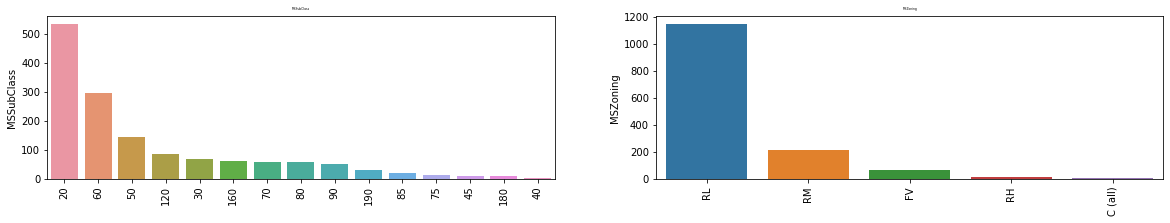

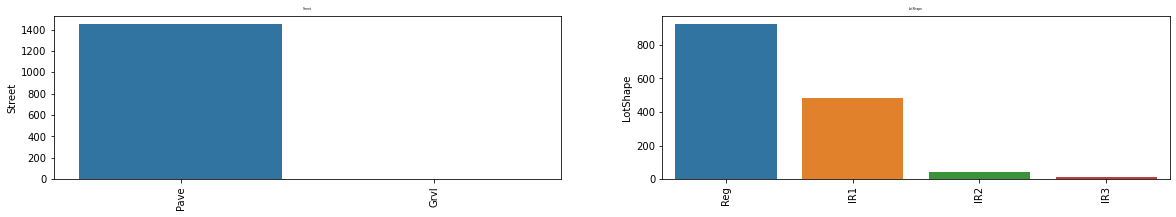

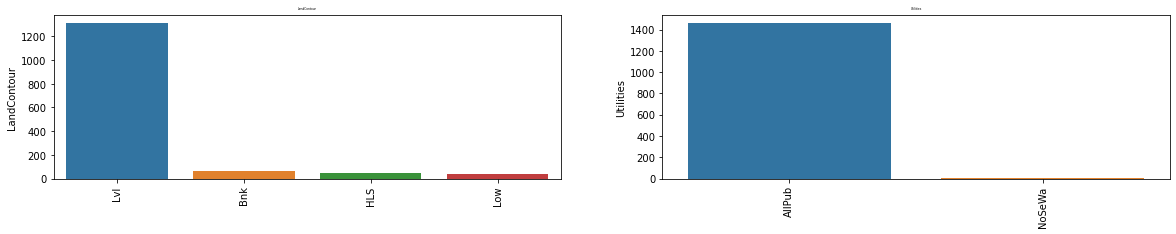

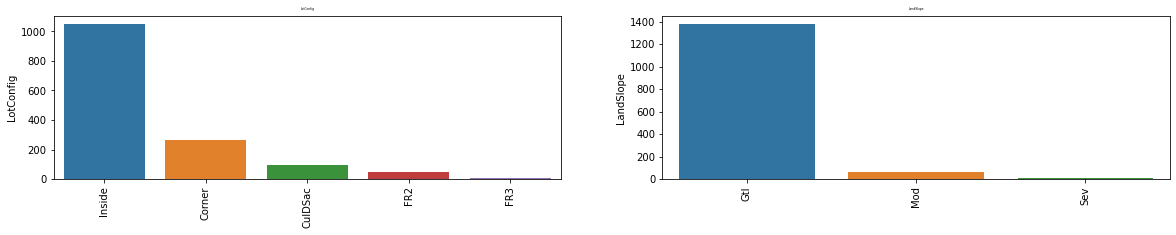

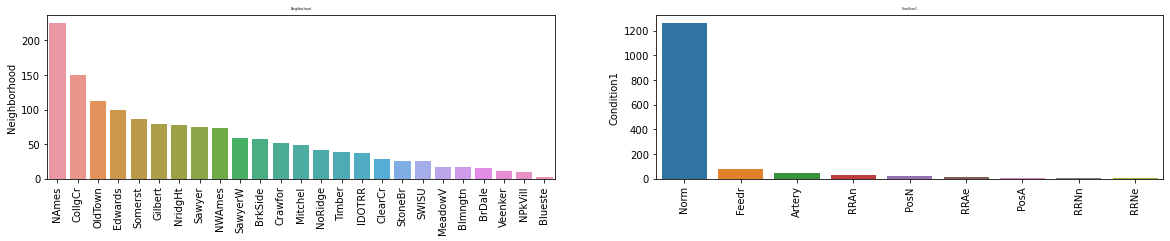

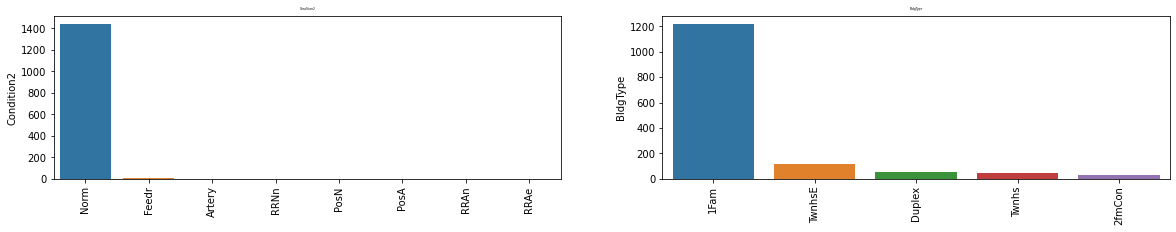

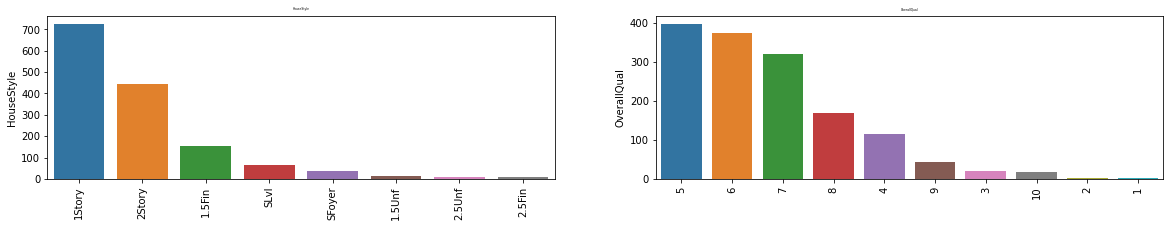

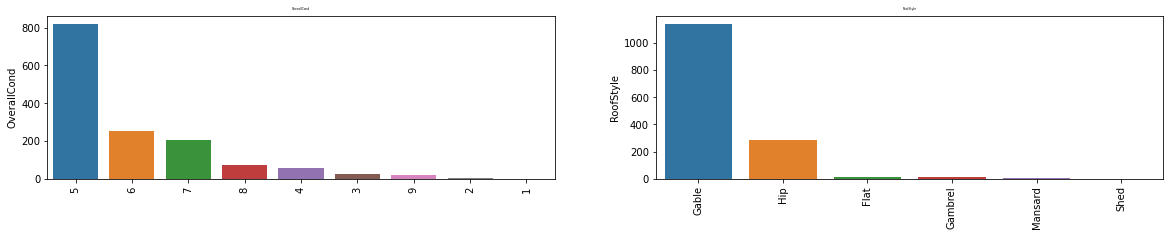

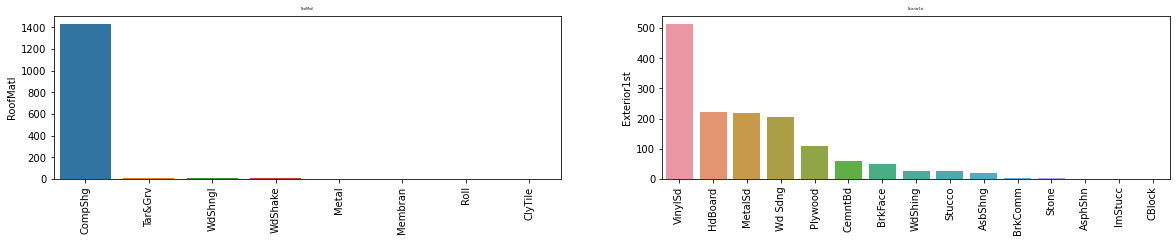

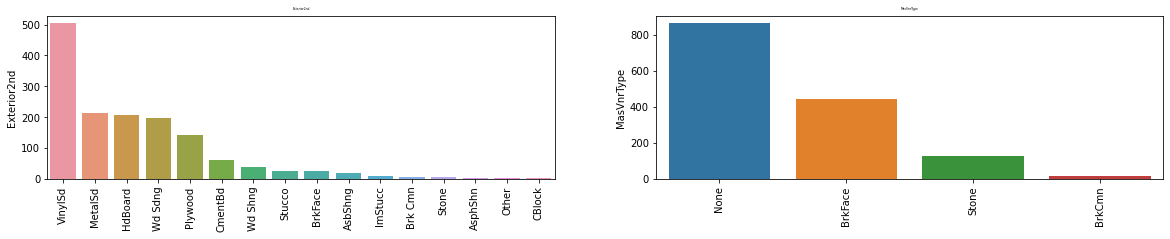

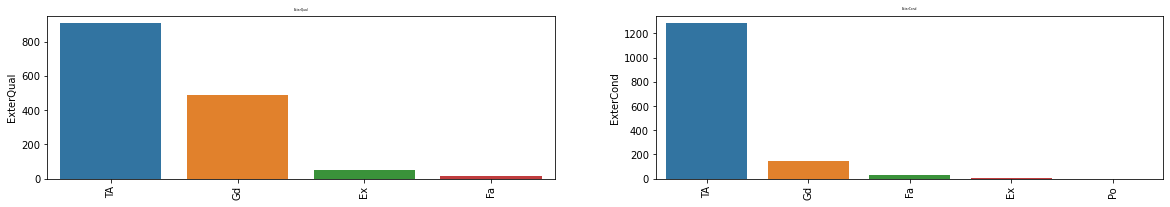

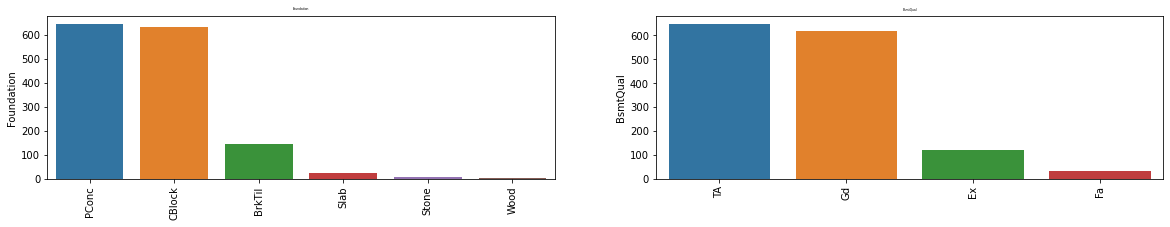

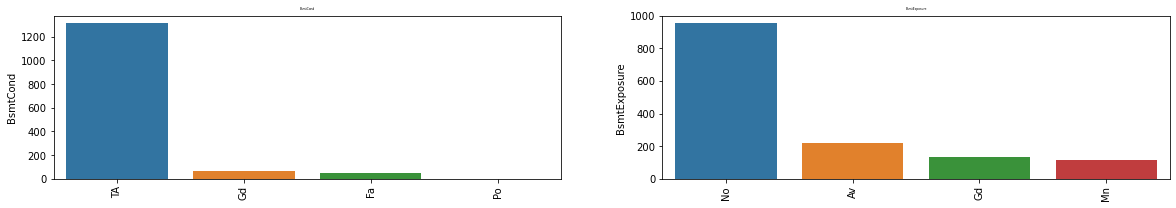

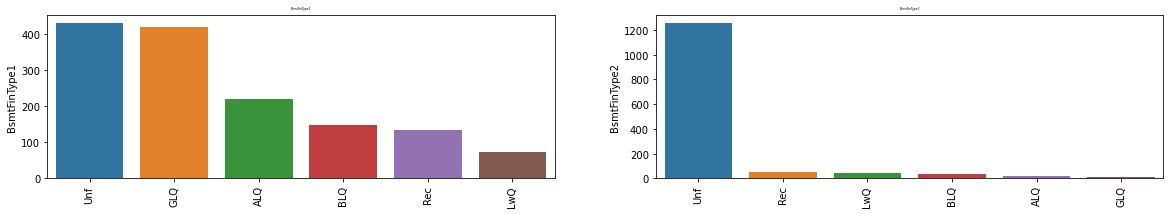

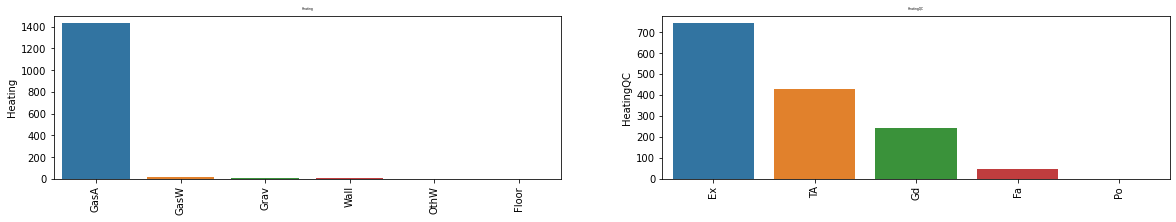

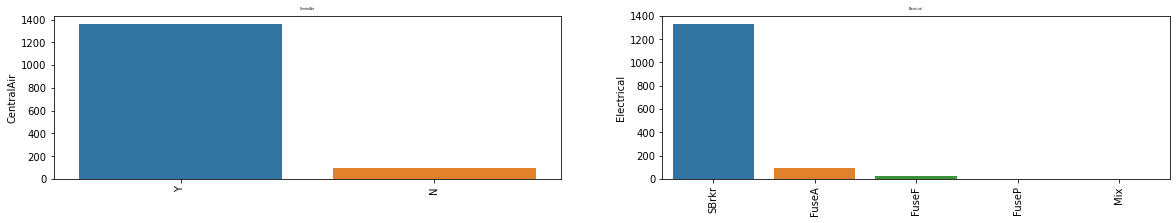

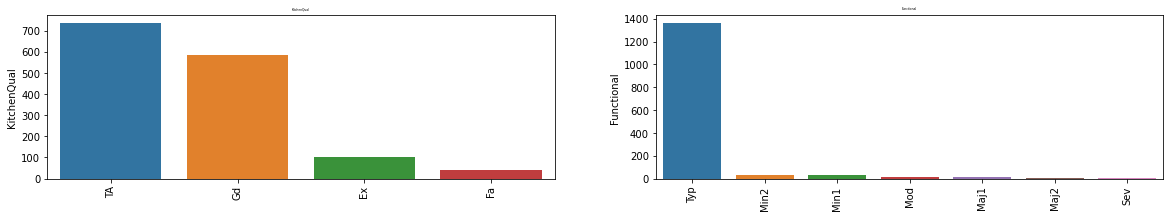

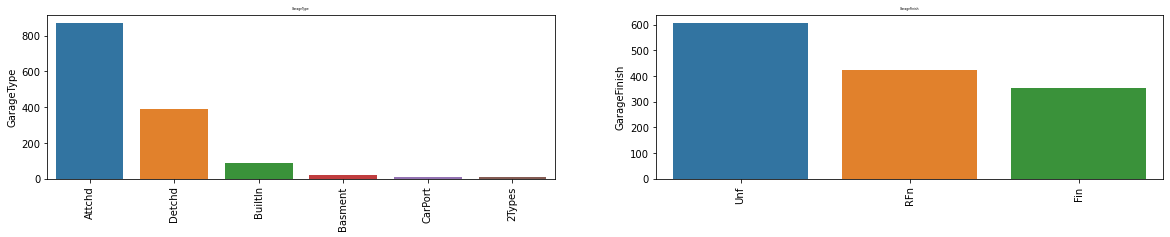

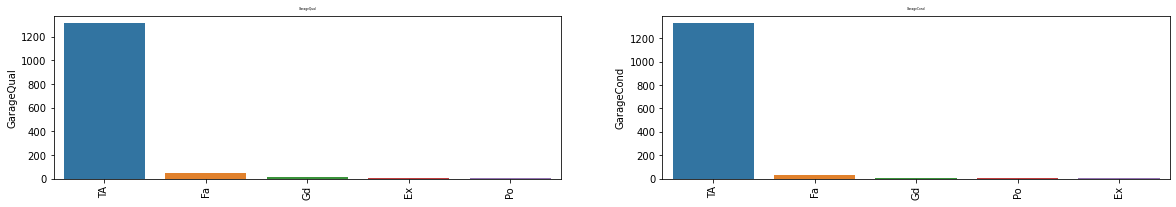

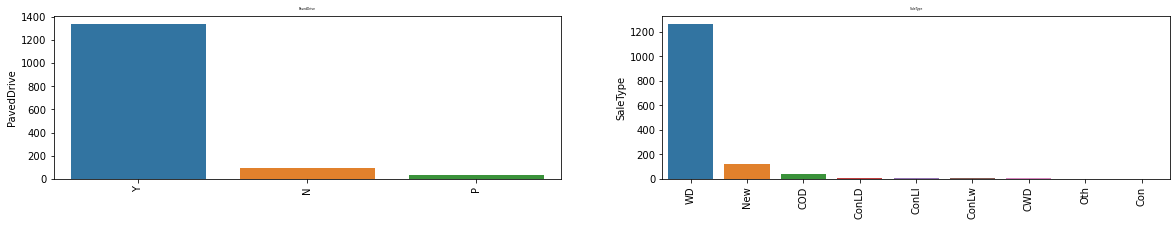

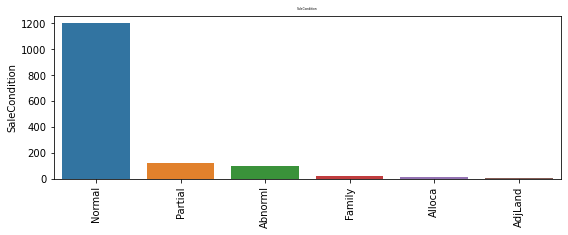

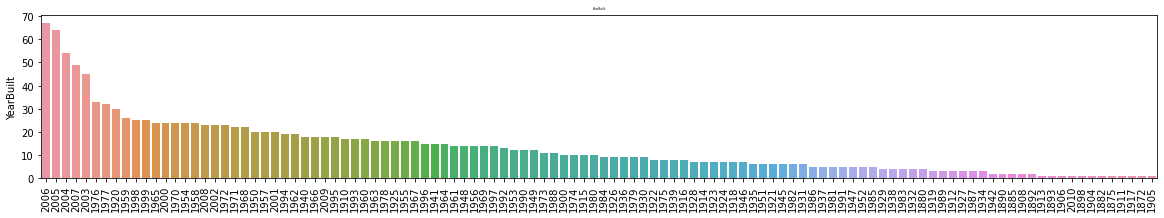

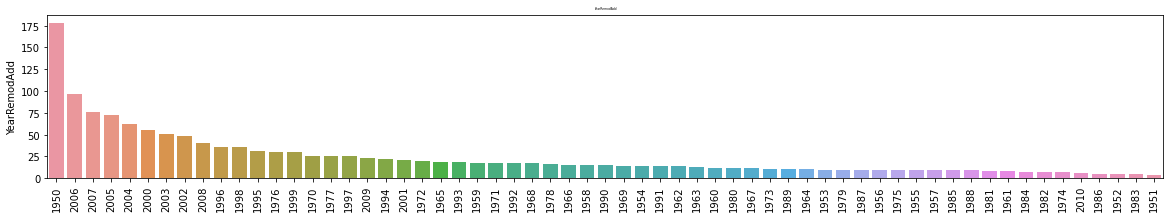

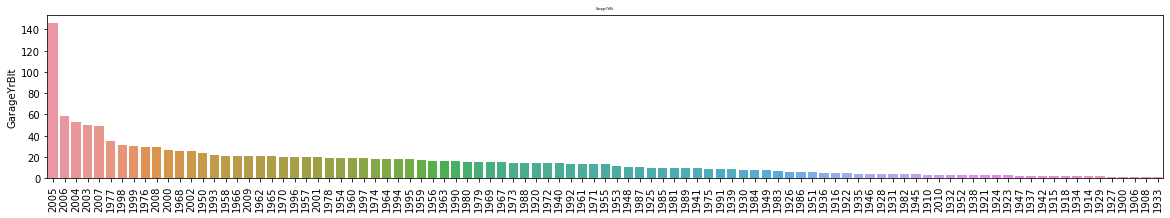

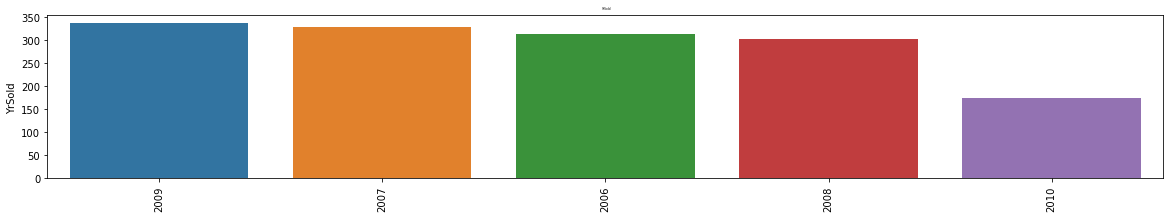

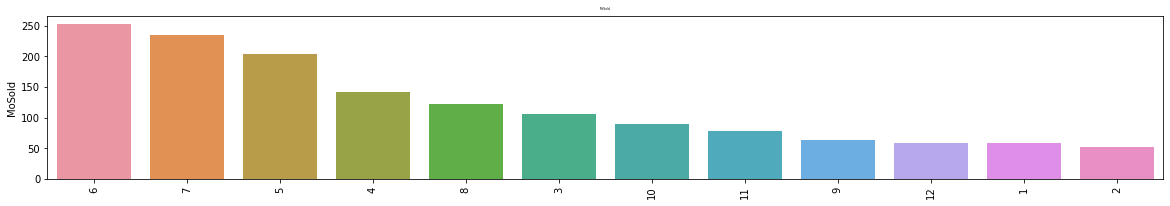

In [397]:
## Plotting the Barplot of the Categorical Columns
k = 0
YrMoColumns = ['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold','MoSold']  
PlotCol = hsingdf.select_dtypes(include=['object']).columns;
for col in (PlotCol.drop(YrMoColumns)):
    if k==0:
        plt.figure(figsize=(20,3))
        plt.subplot(1,2,1)
        k=1
        plt.title(col, fontdict={'fontsize': 3})
        plt.xticks(rotation=90)
        sns.barplot(hsingdf[col].value_counts().index, hsingdf[col].value_counts())
        
    else:
        plt.subplot(1,2,2)
        k=0
        plt.title(col, fontdict={'fontsize': 3})
        plt.xticks(rotation=90)
        sns.barplot(hsingdf[col].value_counts().index, hsingdf[col].value_counts())
        plt.show()
        
for col in YrMoColumns:
        plt.figure(figsize=(20,3))
        k=1
        plt.title(col, fontdict={'fontsize': 3})
        plt.xticks(rotation=90)
        sns.barplot(hsingdf[col].value_counts().index, hsingdf[col].value_counts())

Some Insights
- All the Independent variables the values are not uniformly  distributed.
- In most of the Categorical variables skew towards one of the values for example in the "LandCountour" the Lvl values are seen more than the Bnk,HLS
- The Exterior1st and Exterior2nd have similar trends with respect to its values the #houses having these Exterior features are similar.
- Increasing trend in the nuber of houses sold (YrSold) till 2009 but suddenly decreased in 2010
- 2005 Year sees a Significantly higher  number of Garages built.



#### Missing Data Handling for Numeric Columns

In [398]:
### Numerical Data Columns Data Handling
Num_Columns  = hsingdf.select_dtypes(['float64','int64']).columns
print(Num_Columns)

Index(['Id', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'SalePrice'],
      dtype='object')


In [399]:
#plt.figure(figsize=(20, 12))
#hsingdf[Num_Columns].plot.box()
for NN in Num_Columns:
    if NN in hsingdf.columns:
        #print("{0},Nan(Before removing)={1}".format(NN,hsingdf[NN].isna().sum()))
        hsingdf[NN].replace(np.nan,hsingdf[NN].median(),inplace=True)    
       # print("{0},Nan(After removing)={1}".format(NN,hsingdf[NN].isna().sum()))

###  <a id="2.4"> Exploratory Analysis for Numeric Columns  </a>


[Back to TOC](#0)


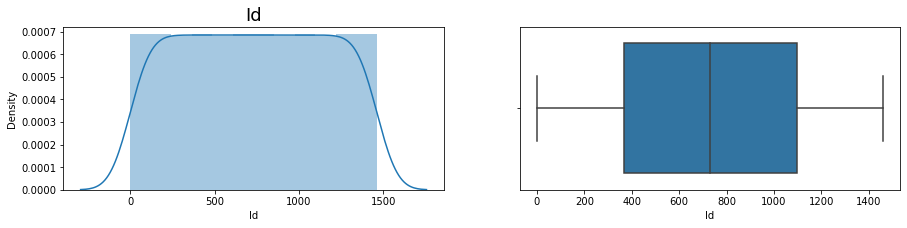

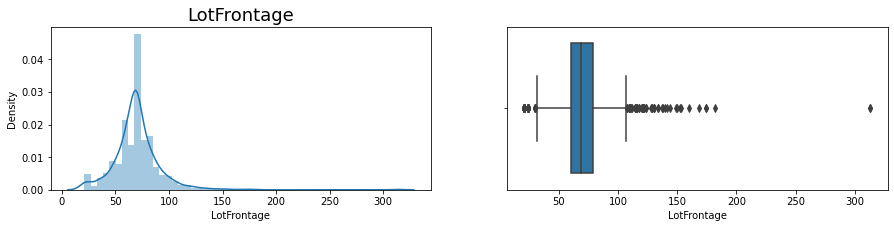

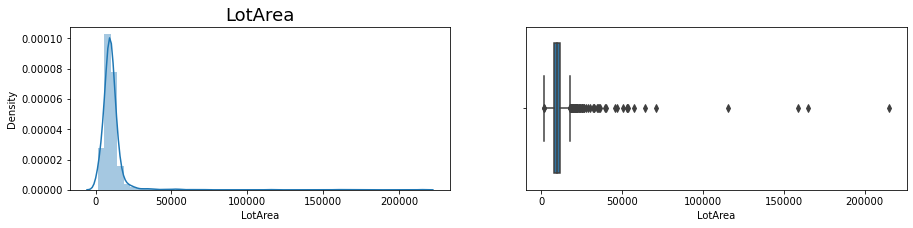

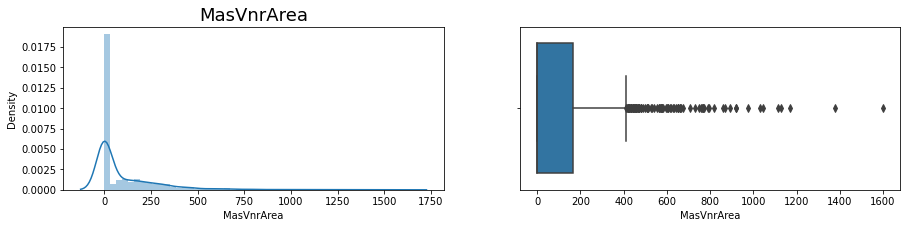

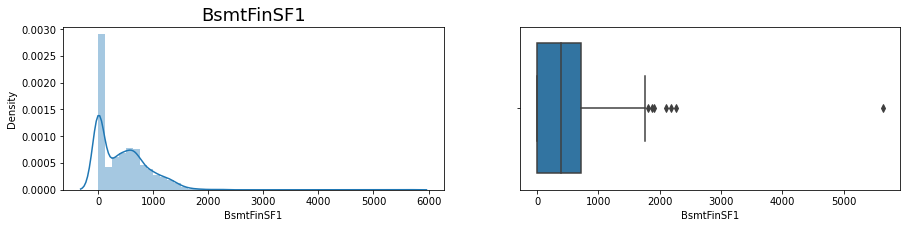

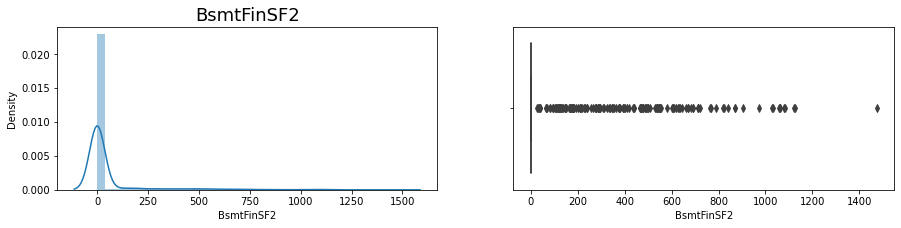

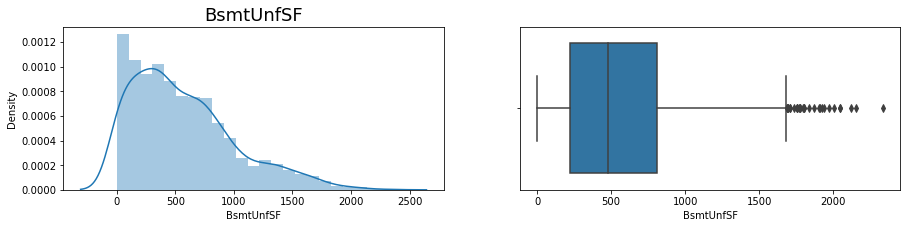

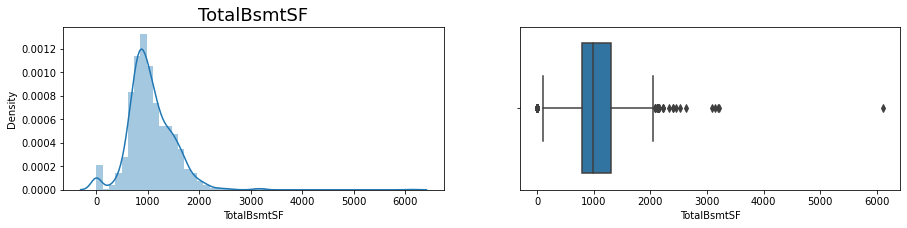

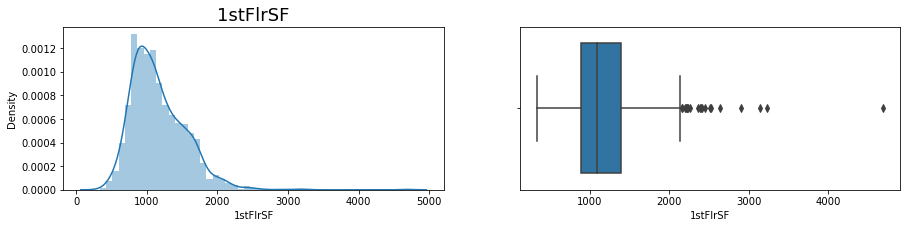

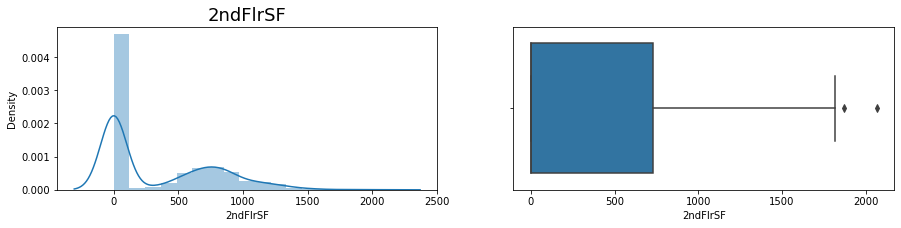

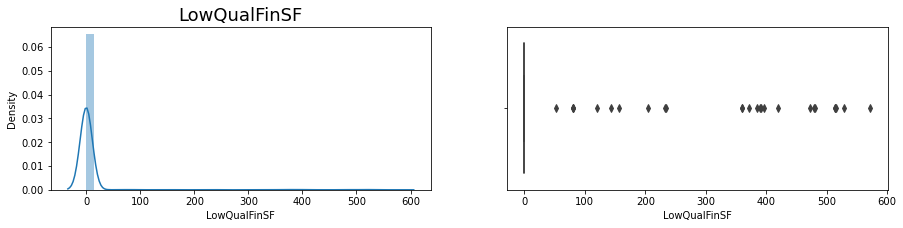

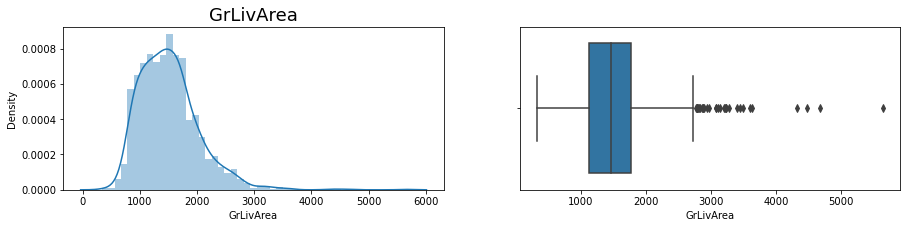

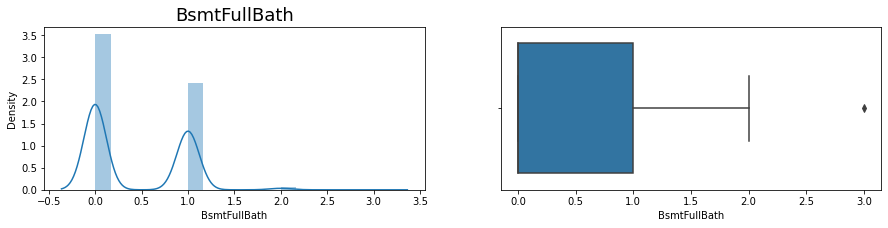

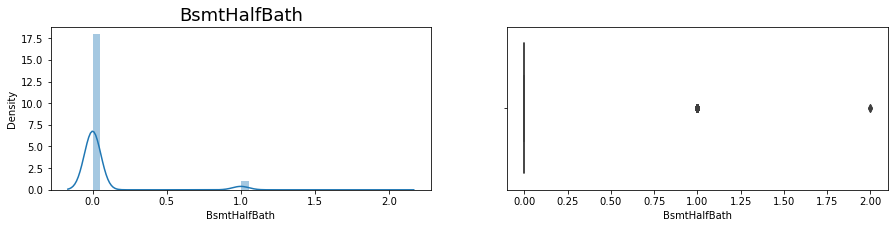

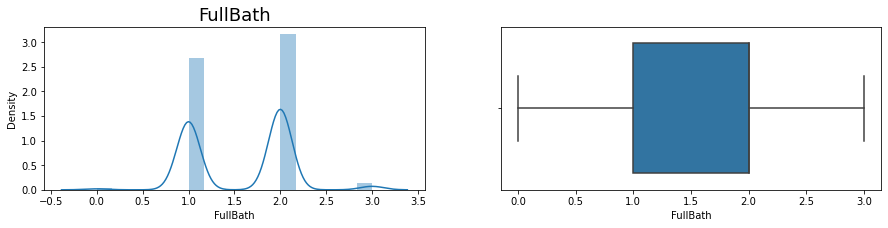

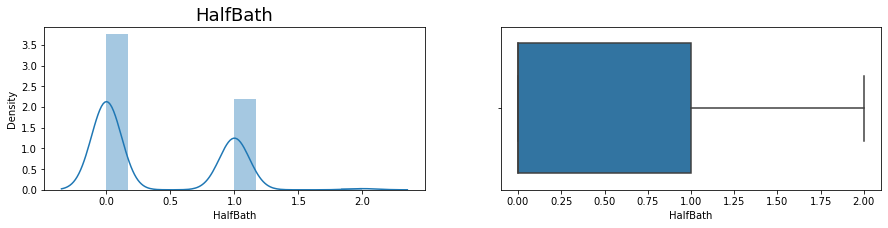

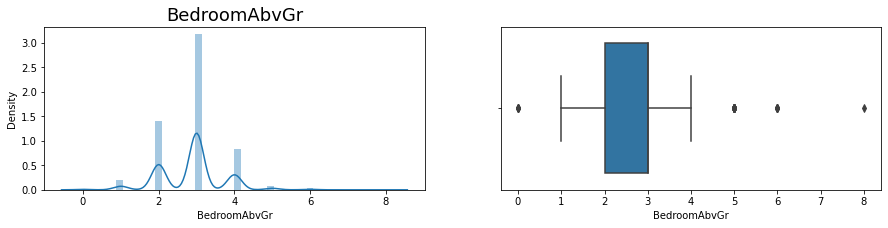

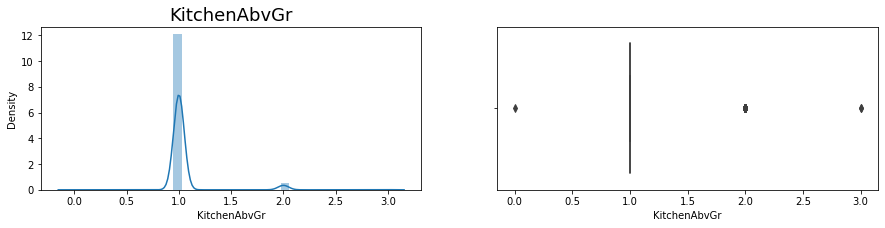

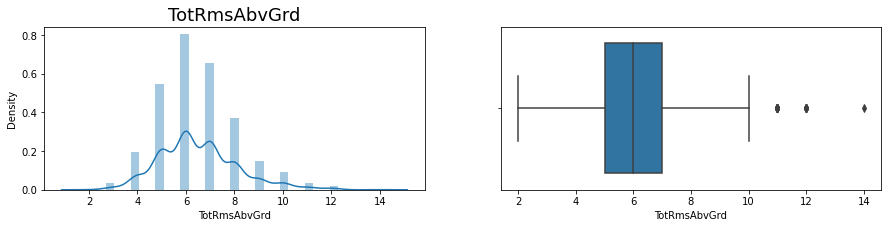

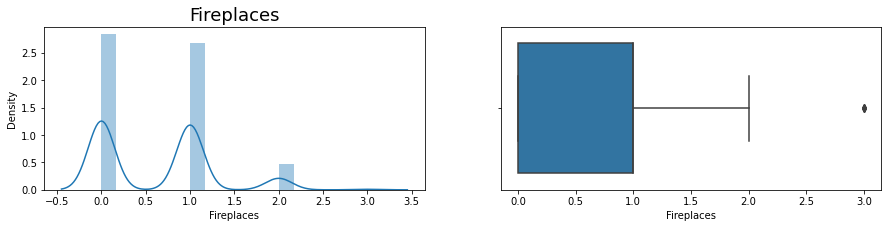

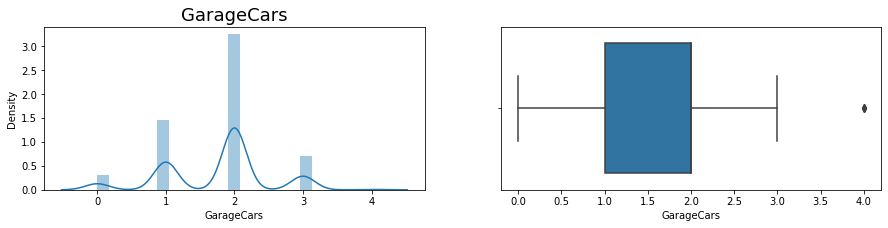

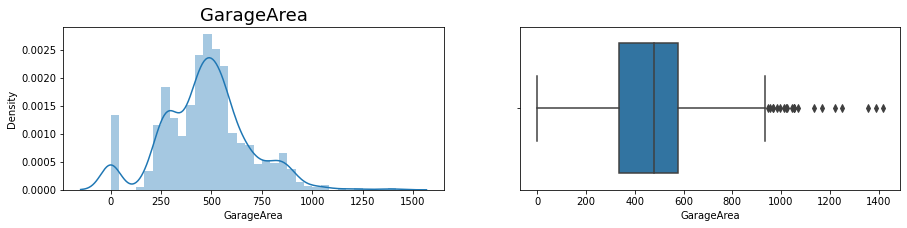

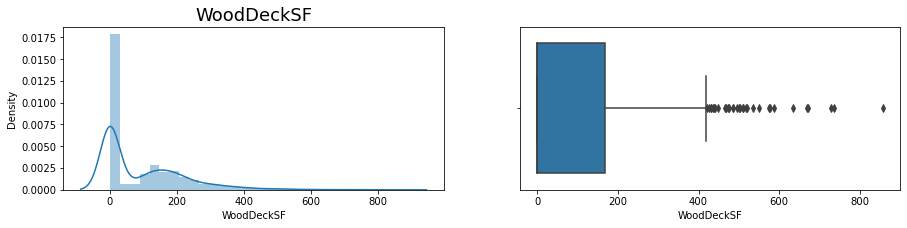

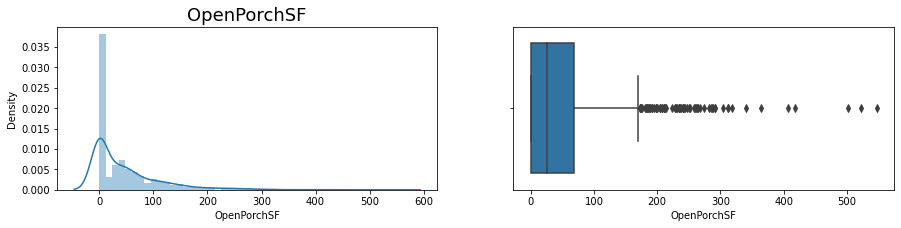

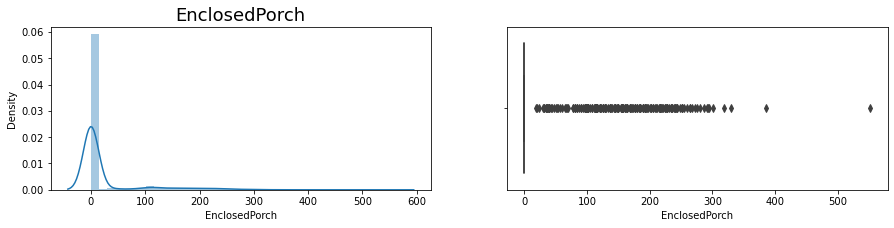

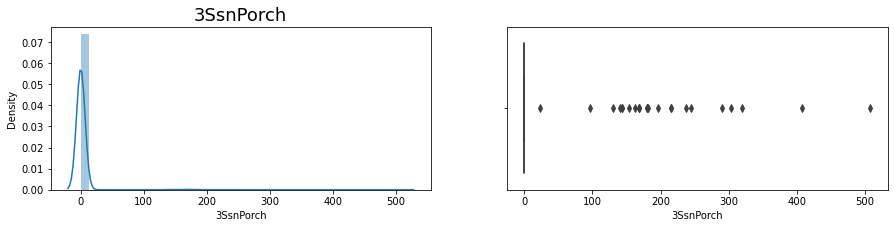

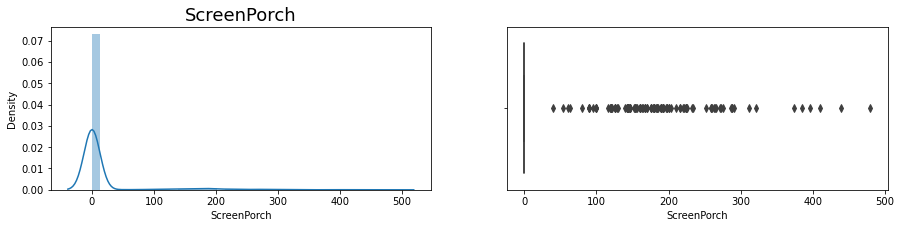

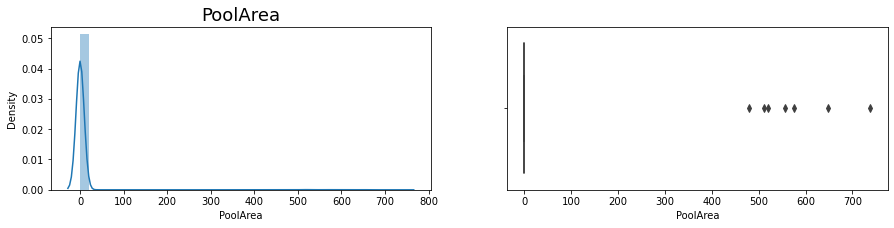

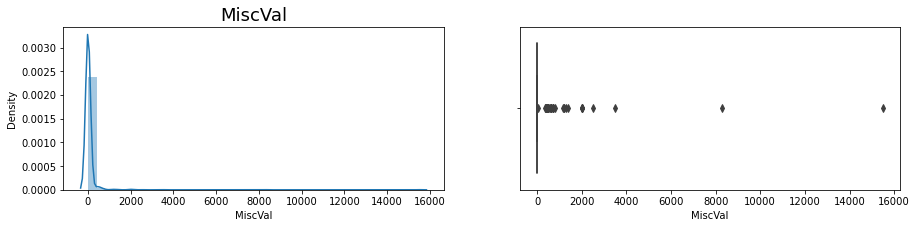

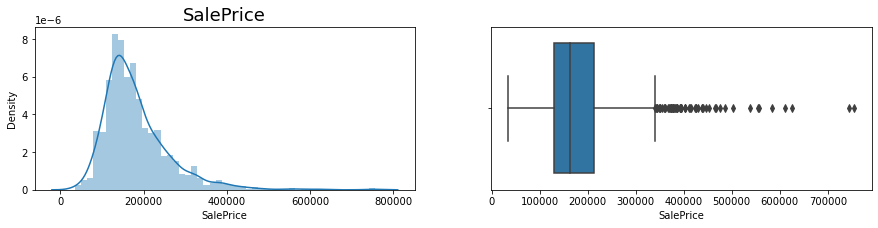

In [400]:
for col in hsingdf.select_dtypes(include=['int64','float64']).columns:
    plt.figure(figsize=(15,3))
    
    plt.subplot(1,2,1)
    plt.title(col, fontdict={'fontsize': 18})
    sns.distplot(hsingdf[col])
    
    plt.subplot(1,2,2)
    sns.boxplot(hsingdf[col])
    plt.show()    

Insights and observations
- Significant Features have outliers and may need outlier corrections
- Outlier needs to be treated
- Sale Price showing a slightly skewed distribution
- Not all Independent Variables showing normal distribution at all
- The  Target Variable is displaying slight Skew . WIll outlier treatment fix up this issue? Will see later.

Box Plot Depicting Outliers


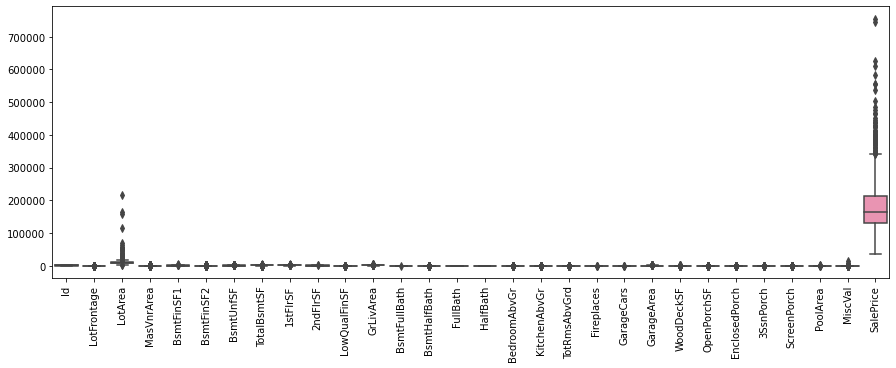

In [401]:
## Check the boxplots again to see if outliers have been treated
print("Box Plot Depicting Outliers")
plt.figure(figsize=[15,5])
plt.xticks(rotation=90)
sns.boxplot(data=hsingdf[hsingdf.select_dtypes(include=['int64','float64']).columns]);

##### Outlier Treatment of Numeric Data

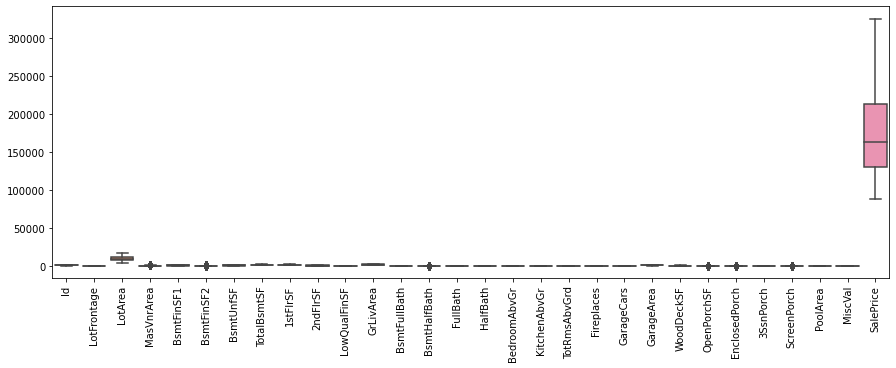

In [402]:
## CLipping  outliers to 2.5% at lower bound and 97.5% at upper bound
Otp = OutlierTreatMentPerc
if OutlierTreatMent:
    for col in  hsingdf.select_dtypes(include=['int64','float64']).columns:
        hsingdf[col][hsingdf[col] <= hsingdf[col].quantile(Otp)] = hsingdf[col].quantile(Otp)
        hsingdf[col][hsingdf[col] >= hsingdf[col].quantile(1-Otp)] = hsingdf[col].quantile(1-Otp)
## Check the boxplots again to see if outliers have been treated
plt.figure(figsize=[15,5])
plt.xticks(rotation=90)
sns.boxplot(data=hsingdf[hsingdf.select_dtypes(include=['int64','float64']).columns]);

### EDA Analysis of the Target Variable

Skew= 0.8093608815268364
Kurtosis= -0.13486401678734516
Mean= 177364.3397260274
Median= 163000.0
Mode= 0    88000.0
Name: SalePrice, dtype: float64


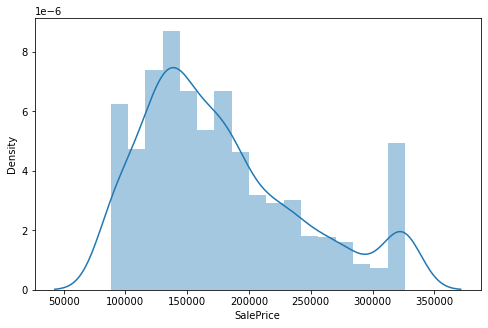

In [403]:

plt.figure(figsize=[8,5])
sns.distplot(hsingdf['SalePrice']);
print("Skew=",hsingdf['SalePrice'].skew())
print("Kurtosis=",hsingdf['SalePrice'].kurt())
print("Mean=",hsingdf['SalePrice'].mean())
print("Median=",hsingdf['SalePrice'].median())
print("Mode=",hsingdf['SalePrice'].mode())

Insights
- The Target-variable is slightly skewed towards right
- The Value of Skew and Kurtosis shows skewness in the Target Variable 
- The Mean Mode and Median are significantly different


In [404]:
if EnableLogTransForTarget:
    hsingdf['SalePrice'] = np.log(hsingdf['SalePrice'])

#### Analysing the Log of the Sales Data

Skew= 0.16055685784475873
Kurtosis= -0.6873107366996791
Mean= 12.023096551039576
Median= 12.0015054797889
Mode= 0    11.385092
Name: SalePrice, dtype: float64


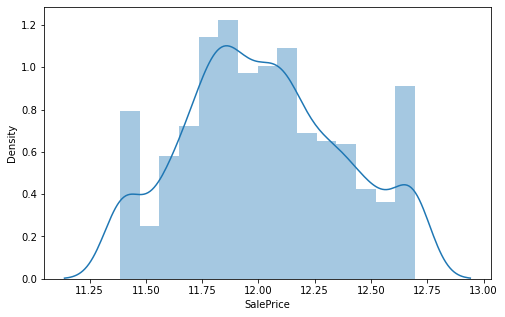

In [405]:
df = np.log(hsingdf['SalePrice'])
if EnableLogTransForTarget:
    df = hsingdf['SalePrice']
    
plt.figure(figsize=[8,5])
sns.distplot(df);
print("Skew=",df.skew())
print("Kurtosis=",df.kurt())
print("Mean=",df.mean())
print("Median=",df.median())
print("Mode=",df.mode())

Insights
- Value of Skew is low
- Mean,Median and Mode are very close
- The target variable can be modified to log 



#### Identifying Collinearity in Numeric Data

<AxesSubplot:>

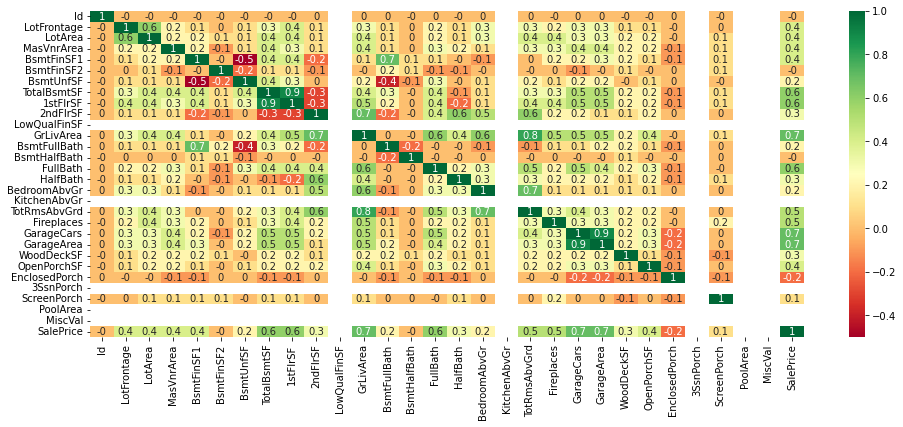

In [406]:
plt.figure(figsize = (16, 6))
sns.heatmap(hsingdf[ hsingdf.select_dtypes(['float64','int64']).columns ].corr().round(1), annot = True, cmap="RdYlGn")


<Figure size 432x576 with 0 Axes>

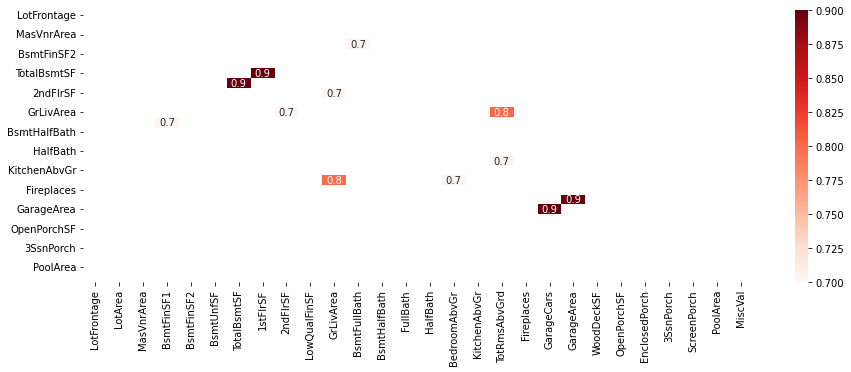

Collinear Pair's=
['BsmtFinSF1', 'BsmtFullBath', 'TotalBsmtSF', '1stFlrSF', '1stFlrSF', 'TotalBsmtSF', '2ndFlrSF', 'GrLivArea', 'GrLivArea', '2ndFlrSF', 'GrLivArea', 'TotRmsAbvGrd', 'BsmtFullBath', 'BsmtFinSF1', 'BedroomAbvGr', 'TotRmsAbvGrd', 'TotRmsAbvGrd', 'GrLivArea', 'TotRmsAbvGrd', 'BedroomAbvGr', 'GarageCars', 'GarageArea', 'GarageArea', 'GarageCars']


In [407]:
## Flitered Correlation plot Function based on Threshold
def plt_filtered_Corr(df,thr):
    dfCorr =df.corr()
    filteredDf = dfCorr[((dfCorr.abs() >= thr)  & (dfCorr !=1.000))]
    plt.figure(figsize=(15,5))
    sns.heatmap(filteredDf.round(1), annot=True, cmap="Reds")
    plt.show()
    return filteredDf
## Getting Collinear Variables.
def get_collinear_pair(Correl):
    df=Correl.dropna(how = 'all').unstack()
    collinear_pair = list()
    corrVal = list()
    for i in df.index:
          if(np.isfinite(df[i])):
                j = list(i)
                collinear_pair.extend(j)
                corrVal.extend([j,df[i].round(2)])
    return collinear_pair,corrVal 
collThr = 0.65;  ## Collunear threshold for elimination
Num_Columns  = hsingdf.select_dtypes(['float64','int64']).columns    
plt.figure(figsize = (6, 8))
#hsingdf.info()
## Remove the Id of Columns
if 'Id' in hsingdf.columns:
    hsingdf.drop(columns =['Id'], inplace = True)
## Remove 'SalesPrice' Collumn to Identify COllinearity between independent columns
if 'SalePrice' in hsingdf.columns:
    hsingdf_indep = hsingdf.drop(columns = 'SalePrice')
NewCol  = hsingdf_indep.select_dtypes(['float64','int64']).columns    
filterCorr = plt_filtered_Corr(hsingdf_indep[NewCol],collThr)
collinear_pair,corrVal = get_collinear_pair(filterCorr)
print("Collinear Pair's=")
print(collinear_pair)


The heatmap shows some useful insights:

Correlation of price with independent variables:
- Sale Price is highly (positively) correlated with OverallQual,MasVnrArea,1stFlrSF,GrLiveArea,FullBath,GarageArea )

Correlation among independent variables: Some columns are eliminated.(Threshold 0.65)
Many independent variables are highly correlated  (Following are some of them)
- (('GrLivArea', 'TotRmsAbvGrd'), 0.8327040479941328) (Eliminate TotRmsAbvGrd)
- (('TotalBsmtSF', '1stFlrSF'), 0.8513654226909566) Optional Elimination
- (('2ndFlrSF', 'GrLivArea'), 0.6757456393740336) (Eliminate 2ndFlrSF)
- (('GarageCars', 'GarageArea'), 0.8994868298684829) Eliminate GarageCars
- (('TotRmsAbvGrd', 'BedroomAbvGr'), 0.6678848867079682) Optional Elimination
- (('BsmtFinSF1', 'BsmtFullBath'), 0.6565299352250297) Optional Elimination



Thus, while building the model, we'll have to pay attention to multicollinearity (especially linear models  suffer more from multicollinearity).

#### Colliniear Feature Elimination

In [408]:
## Elimination of Columns
#Elimate Columns > 70 perc Collinear
EliminateCol60 = ['BedroomAbvGr','BsmtFullBath','2ndFlrSF']
EliminateCol70 = ['TotalBsmtSF','TotRmsAbvGrd','GarageCars']
    #Elimate Columns > 60 perc Collinear
if (ElimCollinearColAbv60):
    hsingdf.drop(columns = EliminateCol60, inplace = True)
    hsingdf.drop(columns = EliminateCol70, inplace = True)
elif (ElimCollinearColAbv70):
    hsingdf.drop(columns = EliminateCol70, inplace = True)

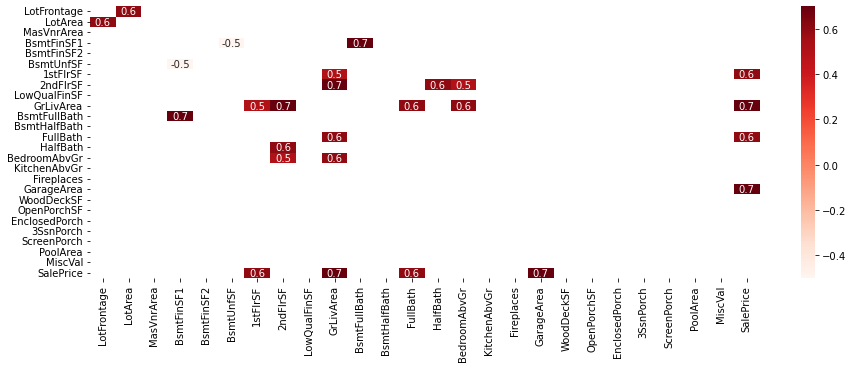

Collinear Pair's=
['BsmtUnfSF', 'GarageArea', 'LotFrontage', 'FullBath', 'BedroomAbvGr', 'GrLivArea', 'HalfBath', '1stFlrSF', 'BsmtFinSF1', '2ndFlrSF', 'BsmtFullBath', 'LotArea', 'SalePrice']


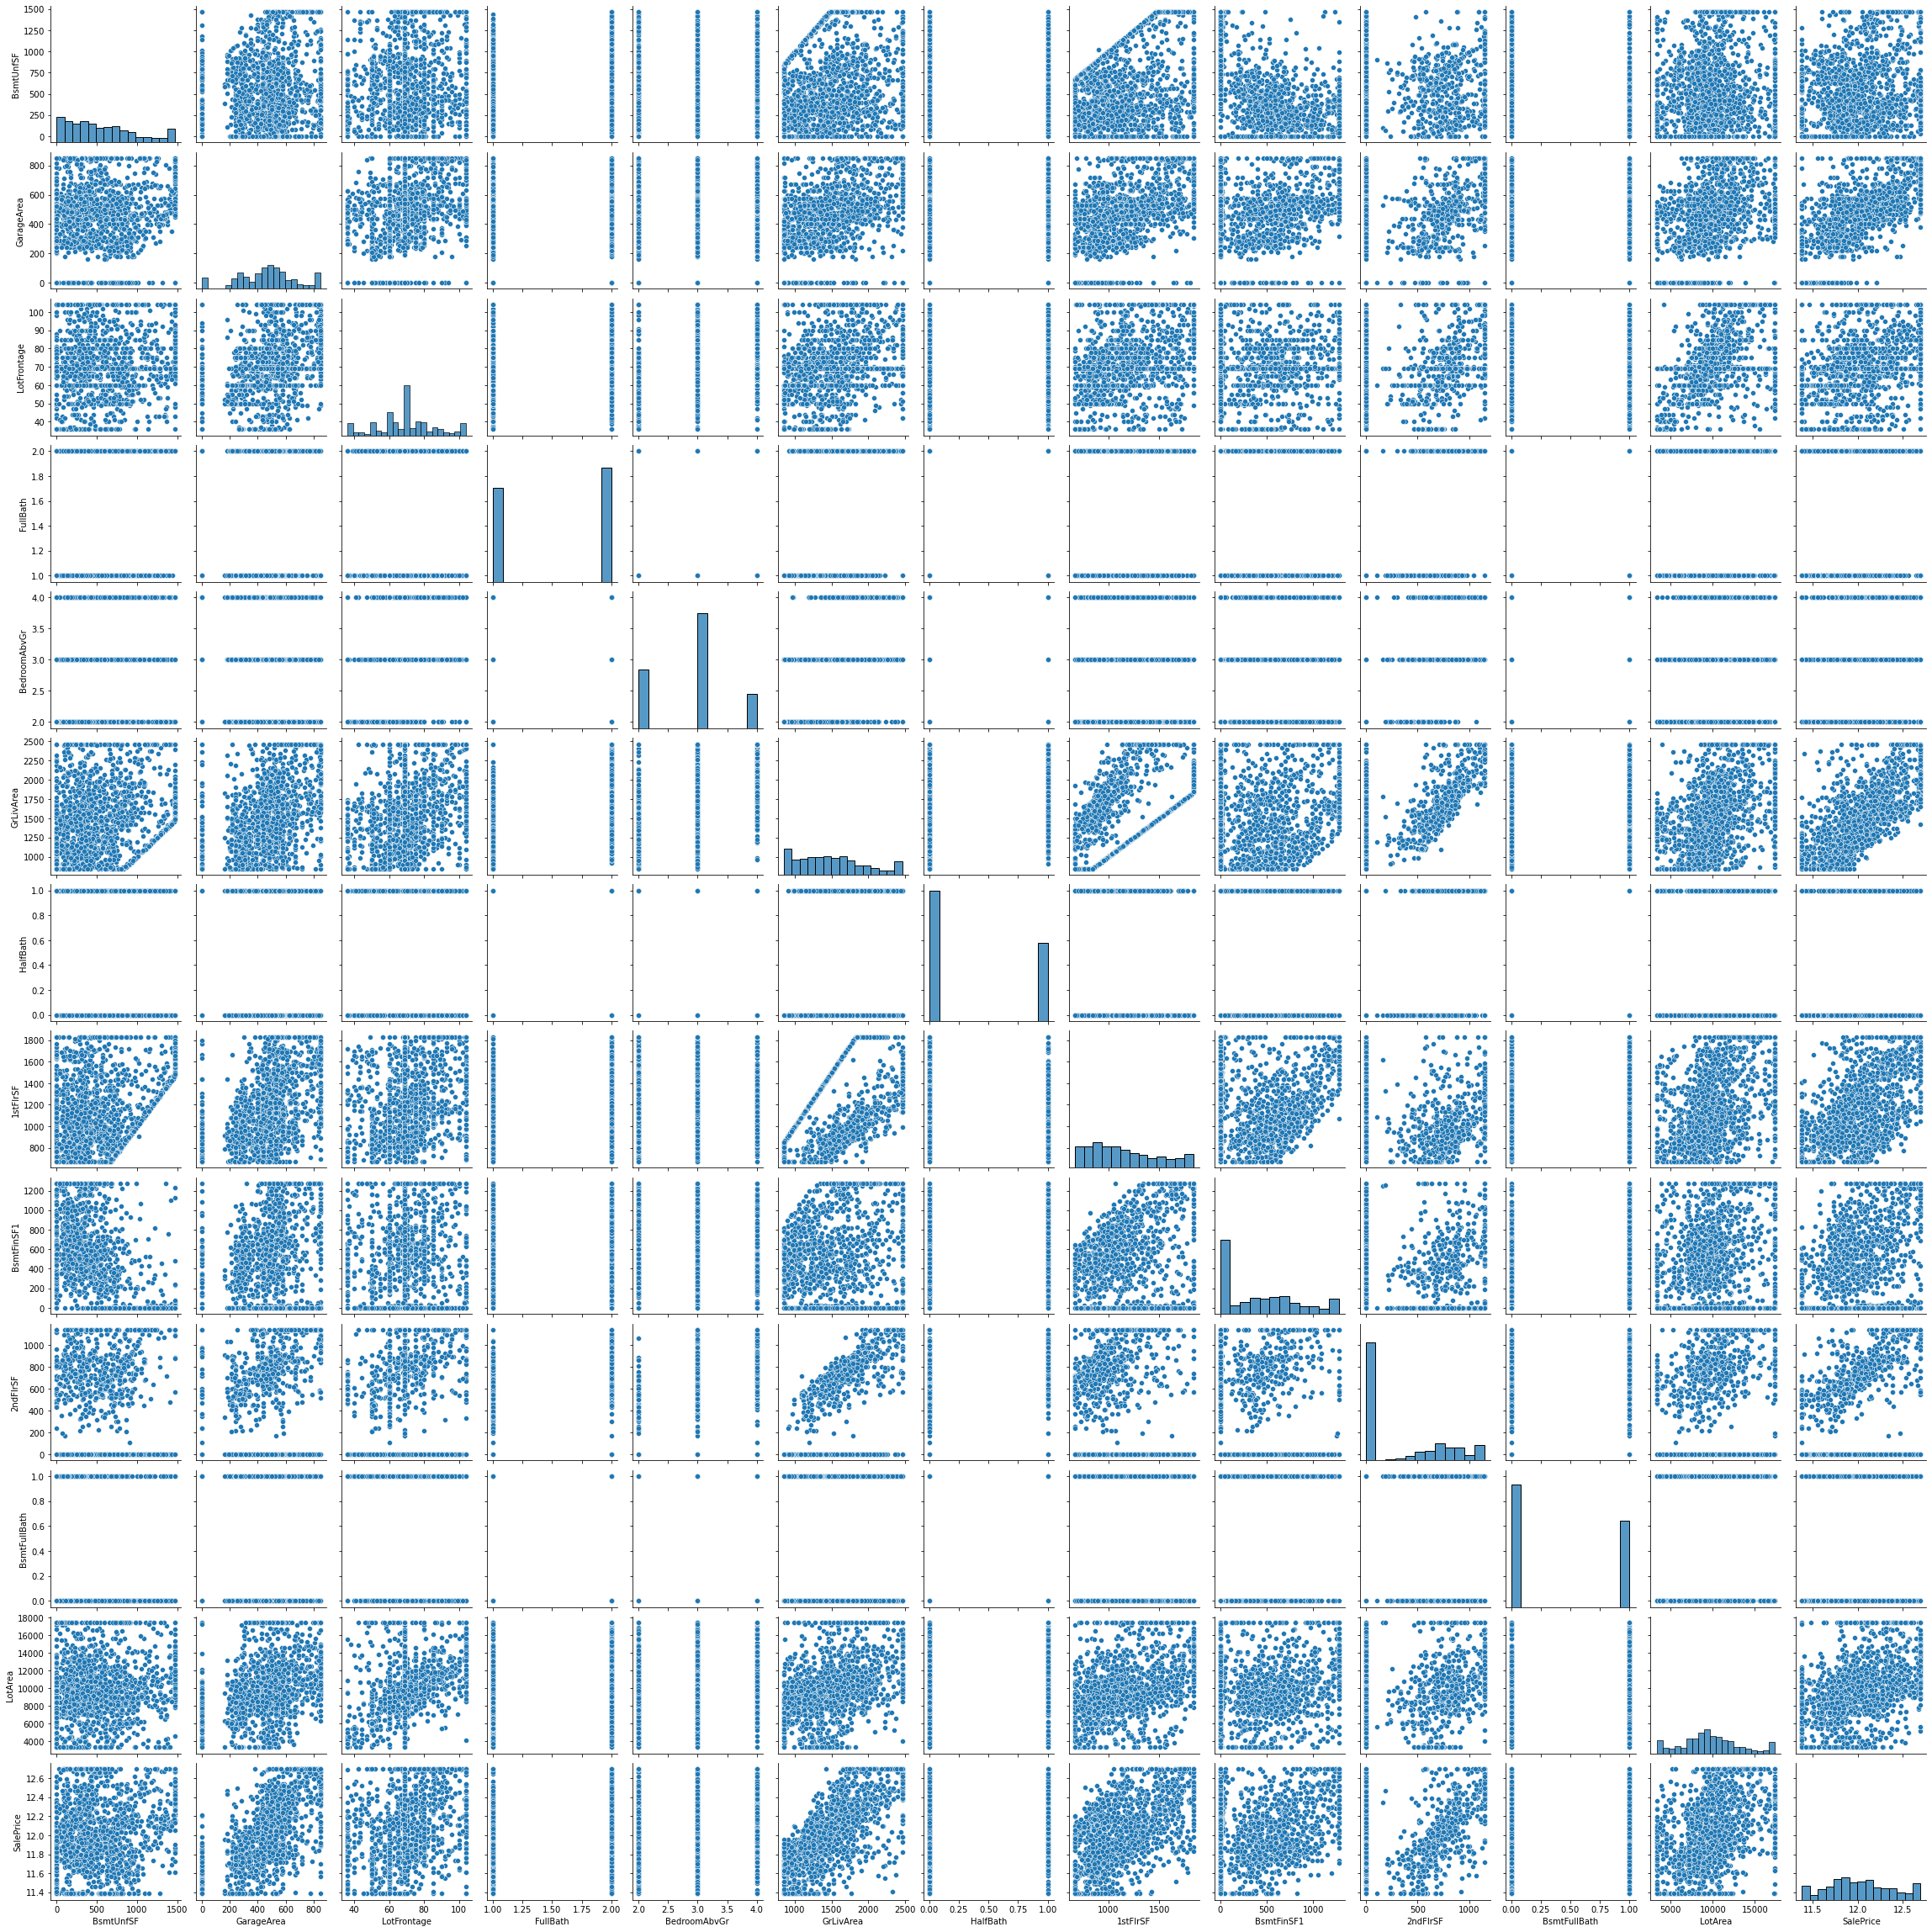

In [409]:
## Correlation  > 0.5
filterCorr = plt_filtered_Corr(hsingdf[hsingdf.select_dtypes(['float64','int64']).columns],0.5)
collinear_pair,corrVal = get_collinear_pair(filterCorr)
print("Collinear Pair's=")
print(list(set(collinear_pair)))
sns.pairplot(hsingdf[list(set(collinear_pair))])
plt.show()

Additional insights
- Looking at the scatterplots between surviving variables it can be seen that there are correlated trends between the various independent variables.
- The elimination at this level may be risky and hence we try to use the RFE process to eliminate the dependent variables.

#### Modification of Categorical Variables and Creation of Dumnmies.


###### Dummy Variable creation for each Categorical columns

In [410]:
Cat_Columns  = hsingdf.select_dtypes('object').columns
Cat_Columns
#print(Cat_Columns[1:4])
for CC in Cat_Columns:
    CC
## Replace nan of categorical columns with mode of the column.
    hsingdf[CC].replace(np.nan,hsingdf[CC].mode()[0],inplace=True)    

## Dummy Creation
hse_categorical = hsingdf.select_dtypes(include=['object'])
hse_categorical.head()
# convert into dummies - one hot encoding
hse_dummies = pd.get_dummies(hse_categorical, drop_first=True)
hse_dummies.info()
hsingdf = hsingdf.drop(list(hse_categorical.columns), axis=1)
hsingdf = pd.concat([hsingdf, hse_dummies], axis=1)
hsingdf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 509 entries, MSSubClass_160 to SaleCondition_Partial
dtypes: uint8(509)
memory usage: 725.8 KB


LotFrontage  LotArea  MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
0         65.0   8450.0       196.0         706         0.0        150   
1         80.0   9600.0         0.0         978         0.0        284   
2         68.0  11250.0       162.0         486         0.0        434   
3         60.0   9550.0         0.0         216         0.0        540   
4         84.0  14260.0       350.0         655         0.0        490   

   1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  ...  SaleType_ConLI  \
0     856.0     854.0             0     1710.0  ...               0   
1    1262.0       0.0             0     1262.0  ...               0   
2     920.0     866.0             0     1786.0  ...               0   
3     961.0     756.0             0     1717.0  ...               0   
4    1145.0    1053.0             0     2198.0  ...               0   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0               0             0             0            1   
1               0             0             0            1   
2               0             0             0            1   
3               0             0             0            1   
4               0             0             0            1   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                      0                     0                     0   
1                      0                     0                     0   
2                      0                     0                     0   
3                      0                     0                     0   
4                      0                     0                     0   

   SaleCondition_Normal  SaleCondition_Partial  
0                     1                      0  
1                     1                      0  
2                     1                      0  
3                     0                      0  
4                     1                      0  

[5 rows x 535 columns]

In [411]:
print("Total Features                      =",hsingdf.shape[1])
print("Total Rows                          =",hsingdf.shape[0])
print("Total Cat. Features(After OneHotEnc)=",hsingdf.select_dtypes(include=['object','uint8']).shape[1])
print("Total Num. Features(After Conv)     =",hsingdf.select_dtypes(include=['int64','float64']).shape[1])

Total Features                      = 535
Total Rows                          = 1460
Total Cat. Features(After OneHotEnc)= 509
Total Num. Features(After Conv)     = 26


In [412]:
print("Total Features                      =",hsingdf.shape[1])
print("Total Rows                          =",hsingdf.shape[0])
print("Total Cat. Feat(Manual Elimination) =",hsingdf.select_dtypes(include=['object','uint8']).shape[1])
print("Total Num. Features(After Conv)     =",hsingdf.select_dtypes(include=['int64','float64']).shape[1])



Total Features                      = 535
Total Rows                          = 1460
Total Cat. Feat(Manual Elimination) = 509
Total Num. Features(After Conv)     = 26


## 3 . <a id="3"> Data Preparations for Model Building </a>

[Back to TOC](#0)

In [413]:
# List of variables to map
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(hsingdf, train_size = 0.7, test_size = 0.3, random_state = 100)

In [414]:
# Check the housing dataframe now
print(df_train.shape)
print(df_test.shape)

(1021, 535)
(438, 535)


In [415]:
num_vars = df_train.select_dtypes(['float64','int64']).columns


#### <a id="3.2"> Rescaling the Features  (Still to decide whether it is required)
 
1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.
Note : MinMax Scaling is Controlled by a Paramter Called EnMinMaxScale configured at the begining of the code

In [416]:
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

num_vars = df_train.select_dtypes(['float64','int64']).columns
if EnMinMaxScaleForY==0:
    df_train[(num_vars.drop('SalePrice'))] = scaler.fit_transform(df_train[(num_vars.drop('SalePrice'))])
else:
    df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train[num_vars].describe()    

LotFrontage      LotArea   MasVnrArea   BsmtFinSF1   BsmtFinSF2  \
count  1021.000000  1021.000000  1021.000000  1021.000000  1021.000000   
mean      0.482396     0.449644     0.201827     0.340565     0.086960   
std       0.244659     0.245351     0.310501     0.323896     0.261811   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.353417     0.293432     0.000000     0.000000     0.000000   
50%       0.485672     0.439215     0.000000     0.307692     0.000000   
75%       0.617928     0.582017     0.346491     0.558870     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

         BsmtUnfSF     1stFlrSF     2ndFlrSF  LowQualFinSF    GrLivArea  ...  \
count  1021.000000  1021.000000  1021.000000        1021.0  1021.000000  ...   
mean      0.376752     0.417148     0.291733           0.0     0.401416  ...   
std       0.286934     0.292470     0.361191           0.0     0.275921  ...   
min       0.000000     0.000000     0.000000           0.0     0.000000  ...   
25%       0.147139     0.174437     0.000000           0.0     0.176751  ...   
50%       0.314714     0.356600     0.000000           0.0     0.381929  ...   
75%       0.549046     0.646680     0.637132           0.0     0.568568  ...   
max       1.000000     1.000000     1.000000           0.0     1.000000  ...   

        Fireplaces   GarageArea   WoodDeckSF  OpenPorchSF  EnclosedPorch  \
count  1021.000000  1021.000000  1021.000000  1021.000000    1021.000000   
mean      0.296278     0.549384     0.260891     0.246783       0.112733   
std       0.315647     0.236932     0.325556     0.305071       0.287399   
min       0.000000     0.000000     0.000000     0.000000       0.000000   
25%       0.000000     0.385837     0.000000     0.000000       0.000000   
50%       0.500000     0.564639     0.000000     0.142816       0.000000   
75%       0.500000     0.677567     0.501493     0.399886       0.000000   
max       1.000000     1.000000     1.000000     1.000000       1.000000   

       3SsnPorch  ScreenPorch  PoolArea  MiscVal    SalePrice  
count     1021.0  1021.000000    1021.0   1021.0  1021.000000  
mean         0.0     0.071388       0.0      0.0     0.485822  
std          0.0     0.250209       0.0      0.0     0.269847  
min          0.0     0.000000       0.0      0.0     0.000000  
25%          0.0     0.000000       0.0      0.0     0.294949  
50%          0.0     0.000000       0.0      0.0     0.456410  
75%          0.0     0.000000       0.0      0.0     0.678419  
max          0.0     1.000000       0.0      0.0     1.000000  

[8 rows x 26 columns]

## 4. <a id="4"> Model Building based on Linear Regression</a>

Aprroach 
We use the combination of Recursive Feature Elimination and Manual Approach

-**LinearRegression function from SciKit Learn** for its compatibility with RFE (which is a utility from sklearn)

[Back to TOC](#0)

###  <a id="4.1"> RFE based Selection</a>


In [417]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [418]:
# Running RFE with the output number of the variable equal to 10
y_train = df_train.pop('SalePrice')
X_train = df_train

lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select=nRFEFeatures)             # running RFE
rfe = rfe.fit(X_train, y_train)
#list(zip(X_train.columns,rfe.support_,rfe.ranking_))

In [419]:
col = X_train.columns[rfe.support_]
col 

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=534)

In [420]:
RFECol = [];
for i in RFECol:
    if i in col:
        col=col.drop(i)

In [421]:
# Adding a constant variable 
import statsmodels.api as sm  
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
#Let's see the summary of our linear model
#print(lm.summary())

#### Funtions for Iterative pValue and VIF Optimization

In [422]:
# Adding a constant variable 
import statsmodels.api as sm  
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Creating X_test dataframe with RFE selected variables
def optimize_pvalue(lm,X_train,y_train,col,DropCol):
    k = 1
    print('optimizing pval...')
    while (lm.pvalues.max() > 0.04):
        for i in DropCol:
            if i in col:
                col=col.drop(i)
        X_train_rfe = X_train[col]
        X_train_rfe = sm.add_constant(X_train_rfe)
        lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model
        #Let's see the summary of our linear model   #    
        DropCol.append(''.join(list(lm.pvalues[lm.pvalues==lm.pvalues.max()].index)))
        if (k%30==0):
            print(lm.pvalues.max())
        k=k+1
       # k=k++
    return(lm,X_train_rfe,DropCol)
def optimize_vif(X_train,y_train,dropCol):    
    vif = pd.DataFrame()
    X = X_train.drop(['const'], axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    k = 1
    print('optimizing vif...')
    while (vif['VIF'].max() > 4.5):
        for i in dropCol:
            if i in X_train.columns:
                X_train =  X_train.drop(i,axis=1)
        # Adding a constant variable 
        import statsmodels.api as sm  
        X_train_lm = sm.add_constant(X_train)
        lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model
        mu, std = stats.norm.fit(lm.resid)
 #       print("Mean of Reidual",mu)
 #       print("Standard Deviation of Residual",std)
        #### VARIANCE INFLATION FACTOR
        vif = pd.DataFrame()
        X = X_train.drop(['const'], axis=1)
        vif['Features'] = X.columns
        vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
        vif['VIF'] = round(vif['VIF'], 2)
        vif = vif.sort_values(by = "VIF", ascending = False)
        dropCol.extend((list(vif[(vif['VIF']==vif['VIF'].max())]['Features'].values)))
        if ((k%20==0)):
            print(vif['VIF'].max())
        k=k+1
       # k=k++
    return(lm,vif,X_train_lm,dropCol)
def get_vif(X_train):
    vif = pd.DataFrame()
    X = X_train.drop(['const'], axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

### <a id="4.2">  PValue Optimization Loop for Feature Selection</a>
- Simulation will take some time for the iteration

In [423]:
lm,X_train_rfe,DropCol = optimize_pvalue(lm,X_train,y_train,col,[])
print(lm.pvalues.max())
vif=get_vif(X_train_rfe)
print("VIF Max                       = ",vif['VIF'].max())
print("#Features in this Optimization= ",lm.conf_int().shape[0])

optimizing pval...
0.9307310944039919
0.869782641276339
0.7730600610825027
0.5733142309226923
0.48791378204637703
0.36658046177952475
0.3705339745099948
0.17799703922195365
0.13318359916266534
0.14781549674760394
0.16939549822107758
0.07775243105408478
0.056220363615670475
0.038667192107692795
VIF Max                       =  inf
#Features in this Optimization=  126


### <a id="4.3">  VIF Optimization Loop for Feature Selection</a>
- Run VIF Optimizer on P-Value Optimized Feature-list
- Run P-Value optimizer again til P-Value reduced < 5percent
- Check VIF again (Run Optimizer again till <5 percent) and on and on


In [424]:
X_train_new =  X_train_rfe
lm,vif,X_train_lm,dropCol = optimize_vif(X_train_new,y_train,DropCol)
print(lm.pvalues.max())
lm,X_train_rfe,DropCol = optimize_pvalue(lm,X_train,y_train,col,dropCol)
vif=get_vif(X_train_rfe)
vif=get_vif(X_train_rfe)
print("VIF Max                              =",vif['VIF'].max())
print("PValue                               = ",lm.pvalues.max())
print("#Features in this Optimization(FINAL)=",lm.conf_int().shape[0])

optimizing vif...
0.9795602121893566
optimizing pval...
0.20304045752809216
VIF Max                              = 2.63
PValue                               =  0.027254508829533446
#Features in this Optimization(FINAL)= 58


In [425]:
vif=get_vif(X_train_rfe)
print("VIF   Max                            =",vif['VIF'].max())
print("PValue                               = ",lm.pvalues.max())
print("#Features in this Optimization(FINAL)=",lm.conf_int().shape[0])


VIF   Max                            = 2.63
PValue                               =  0.027254508829533446
#Features in this Optimization(FINAL)= 58


In [426]:
mu, std = stats.norm.fit(lm.resid)

In [427]:
vif=get_vif(X_train_rfe)
vif.head()

Features   VIF
2       Fireplaces  2.63
48  KitchenQual_Gd  2.56
18   OverallQual_5  2.46
0     BsmtFullBath  2.44
1         HalfBath  2.25

In [428]:
import functools
X_train_new = X_train_rfe
[lm.params.values[1].astype('str') + lm.params.index[1]]
value =  functools.reduce(lambda x,y: x+y, zip(lm.params.values.round(Prec).astype('str'), lm.params.index))
m = map(lambda x: "("+x[0]+")"+'*'+x[1], zip(lm.params.round(Prec).values.astype('str'), lm.params.index))
Lin_Reg_Equation = functools.reduce(lambda x,y: x +'+'+y, m)
print(lm.summary())
print('-------------------------------------------------------')
print(lm.params)
print('-------------------------------------------------------')
print('Linear Regression Equation is ')
print("SalePrice = ",Lin_Reg_Equation)
print('-------------------------------------------------------')
vif = pd.DataFrame()
vif=get_vif(X_train_new)
vif.head()

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     97.67
Date:                Wed, 28 Dec 2022   Prob (F-statistic):               0.00
Time:                        18:22:01   Log-Likelihood:                 866.35
No. Observations:                1021   AIC:                            -1617.
Df Residuals:                     963   BIC:                            -1331.
Df Model:                          57                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.5781 

Features   VIF
2       Fireplaces  2.63
48  KitchenQual_Gd  2.56
18   OverallQual_5  2.46
0     BsmtFullBath  2.44
1         HalfBath  2.25

### <a id="4.4">   Residual Analysis on Training data</a>
[Back to TOC](#0)


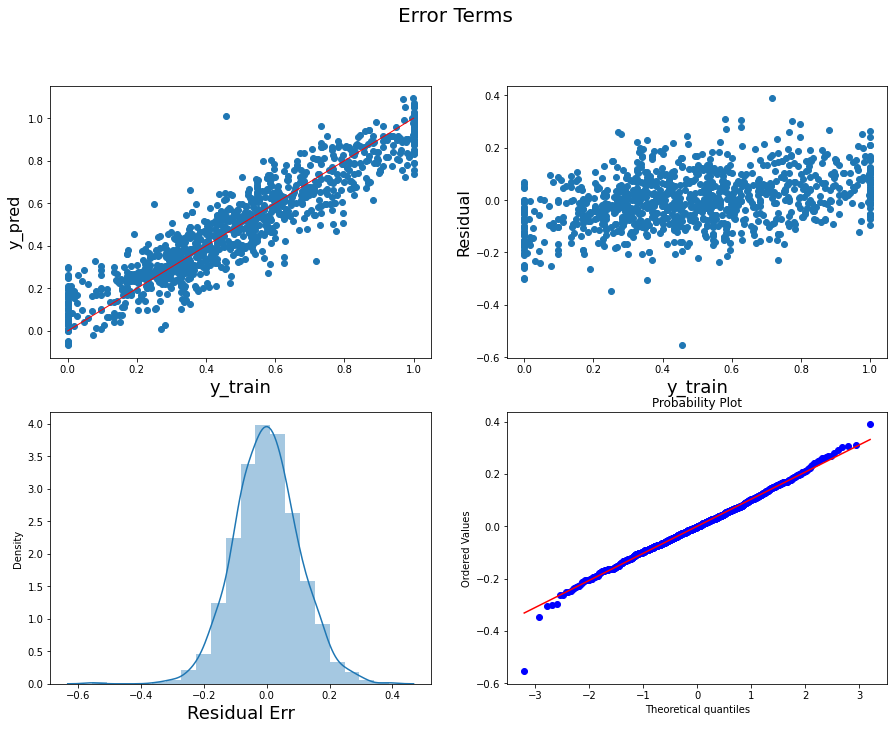

Scores on Training Data 
--------------------
Root Means Square Error =  0.10344080432788601
R2 Score           =  0.853
--------------------


In [429]:

y_train_dmd = lm.predict(X_train_new)
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig = plt.figure(figsize = (15, 11))
plt.subplot(2,2,1)
Y_max = y_train.max()
Y_min = y_train.min()
plt.scatter(y_train,y_train_dmd)
fig.suptitle('y_train vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)         
X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.subplot(2,2,2)
plt.scatter(y_train,(y_train - y_train_dmd))
fig.suptitle('y_train vs Residual', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=18)                          # X-label
plt.ylabel('Residual', fontsize=16)    

# Plot the histogram of the error terms
plt.subplot(2,2,3)
sns.distplot((y_train - y_train_dmd), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Residual Err', fontsize = 18)                         # X-label

plt.subplot(2,2,4)
stats.probplot((y_train - y_train_dmd), dist="norm", plot=pylab)
pylab.show()
r2s_train=r2_score(y_true = y_train,y_pred = y_train_dmd)
mse_train = mean_squared_error(y_train, y_train_dmd)

print("Scores on Training Data ")
print("--------------------")

print("Root Means Square Error = ",mse_train.round(4)**0.5)
print("R2 Score           = ",r2s_train.round(3))
print("--------------------")

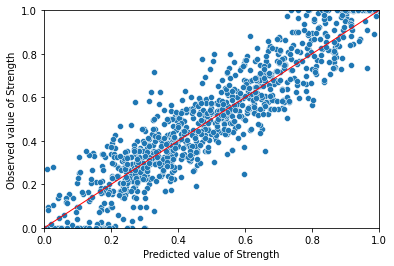

In [430]:
ax = sns.scatterplot(x=lm.fittedvalues, y=y_train)
Y_max = y_train.max()
Y_min = y_train.min()
ax.set(ylim=(Y_min, Y_max))
ax.set(xlim=(Y_min, Y_max))
ax.set_xlabel("Predicted value of Strength")
ax.set_ylabel("Observed value of Strength")
X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.show()

### <a id="4.5">  Residual Analysis on Test data</a>
[Back to TOC](#0)



In [431]:
X=np.append([df_train.select_dtypes(['float64','int64']).columns.values],'SalePrice')
if EnMinMaxScaleForY==0:
    num_vars = df_train.select_dtypes(['float64','int64']).columns
else:
    num_vars = np.append([df_train.select_dtypes(['float64','int64']).columns.values],'SalePrice')

if EnMinMaxScaleForY:    
    df_test[num_vars] = scaler.transform(df_test[num_vars])
else:
    df_test[num_vars] = scaler.transform(df_test[num_vars])

y_test = df_test.pop('SalePrice')
X_test = df_test
X_train_new.columns
# Now let's use our model to make predictions.
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.drop(['const'], axis=1).columns]
# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)
# Making predictions
y_pred = lm.predict(X_test_new)
    

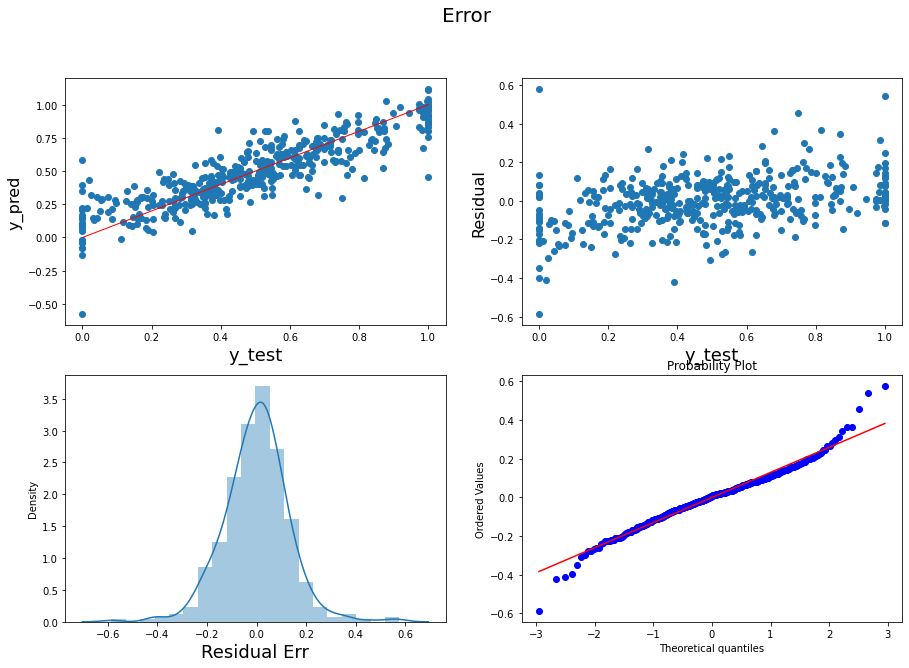

Scores on Test Data 
--------------------
Root Means Square Error =  0.13114877048604
R2 Score                =  0.76
--------------------


In [432]:
fig = plt.figure(figsize = (15, 10))
plt.subplot(2,2,1)
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)         
plt.subplot(2,2,1)
Y_max = y_test.max()
Y_min = y_test.min()
X_ref = Y_ref = np.linspace(Y_min, Y_max, 100);
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.subplot(2,2,2)
plt.scatter(y_test,(y_test - y_pred))
fig.suptitle('y_test vs Residual', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('Residual', fontsize=16)    

# Plot the histogram of the error terms
plt.subplot(2,2,3)
sns.distplot((y_test - y_pred), bins = 20)
fig.suptitle('Error ', fontsize = 20)                  # Plot heading 
plt.xlabel('Residual Err', fontsize = 18)                         # X-label

plt.subplot(2,2,4)
stats.probplot((y_test - y_pred), dist="norm", plot=pylab)
pylab.show()
# Find the R2Score with the testset
from sklearn.metrics import r2_score , mean_squared_error
r2s_test=r2_score(y_true = y_test,y_pred = y_pred)
mse_test = mean_squared_error(y_test, y_pred)
print("Scores on Test Data ")
print("--------------------")

print("Root Means Square Error = ",mse_test.round(4)**0.5)
print("R2 Score                = ",r2s_test.round(3))
print("--------------------")


### 5 <a id="5"> Final Linear Regression Results </a>
[Back to TOC](#0)


In [433]:
import functools
print('-------------------------------------------------------')

if EnMinMaxScaleForY:
    print('FIT IS WITH MIN-MAX SCALING ON TARGET')
else:
    print('NO MIN MAX SCALING')
print('Initial RFE Features Considered = ',nRFEFeatures)
print('-------------------------------------------------------')
print('Final Features and Coefficients')
print('------------------------------')

## Printing based on the strength coefficient value
print(lm.params[lm.params.abs().sort_values(ascending=False).index])
#print(lm.params.round(Prec))
print('-------------------------------------------------------')
print('-----------------SCORE ON TEST DATA--------------------')
print("Root Means Square Error = ",np.sqrt(mse_test.round(4)))
print("MSE                     = ",(mse_test.round(4)))

print("R2 Score                = ",r2s_test.round(3))
print('------------------SCORE ON TRAINING DATA---------------')
print("Root Means Square Error = ",np.sqrt(mse_train.round(4)))
print("MSE                     = ",(mse_train.round(4)))
print("R2 Score                = ",r2s_train.round(3))
print('----------------OLS Regression Result-------------------')
print("F-Stats                 = ",lm.fvalue)
print("P(F-Stats)              = ",lm.f_pvalue)
print("AIC                     = ",lm.aic)
print("BIC                     = ",lm.bic)
print('----------------------Final Feature Parameter Summary--------------------------------')
pVdf  = pd.DataFrame({'Features' : lm.pvalues.index.values ,'p-val' : lm.pvalues.values.round(3)}  )
vIfdf = pd.DataFrame({'Features' : vif.Features.values ,'VIF' : vif.VIF.values } )
ceofdf = pd.DataFrame({'Features' : lm.params.index.values ,'Coeff' : lm.params.values } )
concatdF = pVdf.merge(vIfdf,on='Features')
concatdF = concatdF.merge(ceofdf,on='Features')
concatdF = concatdF.sort_values(by='Coeff',key=abs,ascending=False)
concatdF.index = concatdF.index.sort_values()
value =  functools.reduce(lambda x,y: x+y, zip(list(concatdF.Coeff.values.round(Prec).astype('str')), concatdF.Features.values))
m = map(lambda x: "("+x[0]+")"+'*'+x[1], zip(concatdF.Coeff.round(Prec).values.astype('str'), concatdF.Features.values))
Lin_Reg_Equation = functools.reduce(lambda x,y: x +'+'+y, m)
print('Best Fitted Line ')
print('---------------- ')
print("SalePrice = ","".join([Lin_Reg_Equation,'+',lm.params.index[0],'*',lm.params.values[0].round(2).astype('str')]))
print('--------------------------------------------------------------------------------')
concatdF


-------------------------------------------------------
FIT IS WITH MIN-MAX SCALING ON TARGET
Initial RFE Features Considered =  600
-------------------------------------------------------
Final Features and Coefficients
------------------------------
BsmtCond_Po            -0.668176
const                   0.578095
OverallQual_3          -0.462437
OverallQual_2          -0.453495
OverallQual_4          -0.403082
Condition2_PosN        -0.402971
OverallQual_5          -0.335804
YearBuilt_1880          0.311000
YearBuilt_1898         -0.299887
OverallQual_6          -0.272009
YearBuilt_1987          0.261693
GarageYrBlt_1910        0.211509
YearBuilt_1931         -0.210482
YearBuilt_1935         -0.185430
YearBuilt_1938         -0.167897
MSSubClass_160         -0.148724
OverallQual_7          -0.148045
Neighborhood_MeadowV   -0.138811
YearBuilt_1924         -0.136443
YearBuilt_1926         -0.134716
Neighborhood_Crawfor    0.128368
OverallQual_9           0.114260
GarageType_CarPort    

Features  p-val   VIF     Coeff
0            BsmtCond_Po  0.000  1.07 -0.668176
1          OverallQual_3  0.000  1.20 -0.462437
2          OverallQual_2  0.000  1.11 -0.453495
3          OverallQual_4  0.000  1.63 -0.403082
4        Condition2_PosN  0.000  1.06 -0.402971
5          OverallQual_5  0.000  2.46 -0.335804
6         YearBuilt_1880  0.000  1.04  0.311000
7         YearBuilt_1898  0.027  1.62 -0.299887
8          OverallQual_6  0.000  2.17 -0.272009
9         YearBuilt_1987  0.001  1.04  0.261693
10      GarageYrBlt_1910  0.011  1.80  0.211509
11        YearBuilt_1931  0.000  1.05 -0.210482
12        YearBuilt_1935  0.016  1.03 -0.185430
13        YearBuilt_1938  0.007  1.03 -0.167897
14        MSSubClass_160  0.000  1.62 -0.148724
15         OverallQual_7  0.000  2.15 -0.148045
16  Neighborhood_MeadowV  0.000  1.16 -0.138811
17        YearBuilt_1924  0.002  1.04 -0.136443
18        YearBuilt_1926  0.001  1.05 -0.134716
19  Neighborhood_Crawfor  0.000  1.17  0.128368
20         OverallQual_9  0.000  1.30  0.114260
21    GarageType_CarPort  0.007  1.07 -0.113177
22            Fireplaces  0.000  2.63  0.111435
23         OverallCond_3  0.000  1.12 -0.108439
24      GarageYrBlt_1997  0.000  1.05  0.107612
25  Neighborhood_ClearCr  0.000  1.15  0.099930
26        YearBuilt_1940  0.007  1.07 -0.098869
27        YearBuilt_2009  0.003  1.18  0.098304
28        YearBuilt_1910  0.004  1.27 -0.093801
29     YearRemodAdd_1999  0.000  1.11  0.092304
30        YearBuilt_1925  0.006  1.08 -0.085764
31   Exterior1st_BrkFace  0.000  1.18  0.082886
32        YearBuilt_2007  0.000  1.30  0.082043
33        YearBuilt_1920  0.002  1.14 -0.078937
34              HalfBath  0.000  2.25  0.076930
35        YearBuilt_2005  0.000  1.25  0.068240
36      GarageYrBlt_2004  0.000  1.24  0.067987
37     YearRemodAdd_1995  0.002  1.08  0.067664
38      GarageYrBlt_2008  0.006  1.21  0.067340
39        KitchenQual_Fa  0.004  1.18 -0.064863
40            WoodDeckSF  0.000  2.02  0.064240
41        YearBuilt_2006  0.002  1.29  0.059234
42           OpenPorchSF  0.000  2.08  0.058500
43     YearRemodAdd_2000  0.003  1.14  0.053652
44      GarageYrBlt_2003  0.017  1.15  0.047881
45       BsmtExposure_Gd  0.000  1.37  0.046712
46     LotConfig_CulDSac  0.001  1.16  0.046132
47  Neighborhood_Somerst  0.010  1.63  0.045604
48       BldgType_TwnhsE  0.006  1.44 -0.040720
49      BsmtFinType1_Unf  0.000  2.07 -0.040587
50        KitchenQual_Gd  0.000  2.56  0.034582
51         MSSubClass_20  0.000  2.22  0.033841
52          BsmtFullBath  0.000  2.44  0.031303
53     GarageType_Detchd  0.001  2.09 -0.031052
54    MasVnrType_BrkFace  0.000  1.75  0.029675
55    Neighborhood_NAmes  0.006  1.57 -0.029288
56              MoSold_7  0.004  1.22  0.028013

## 6. <a id="6"> Ridge and Lasso Regression </a>

[Back to TOC](#0)

###  6.01 <a id="6.01">Linear Regression with Survived Parameters(SKLEARN)</a>
[Back to TOC](#0)

In [434]:

np.random.seed(0)
df_train, df_test = train_test_split(hsingdf, train_size = 0.7, test_size = 0.3, random_state = 100)
# Include All the Housing Columns
X = hsingdf.drop('SalePrice',axis=1)
y = hsingdf['SalePrice'] # response variable in Y

## Scaling for Training Data
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = df_train.select_dtypes(['float64','int64']).columns

if EnMinMaxScaleForY==1:
    df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
else:
    df_train[num_vars.drop('SalePrice')] = scaler.fit_transform(df_train[num_vars.drop('SalePrice')])

df_train[num_vars].describe() 

## Scaling for Testing Data
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
if EnMinMaxScaleForY==1:
    df_test[num_vars] = scaler.transform(df_test[num_vars])
else:
    df_test[num_vars.drop('SalePrice')] = scaler.transform(df_test[num_vars.drop('SalePrice')])
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test


R2Score(Training) = 0.8525353912148557
R2Score(Test)     = 0.7602489971092214
RSS(Train)        = 3.3094950690729825
RSS(Test)         = 2.743569669928581
RMSE(Train)        = 0.10357355126320465
RMSE(Test)         = 0.13109282965034819


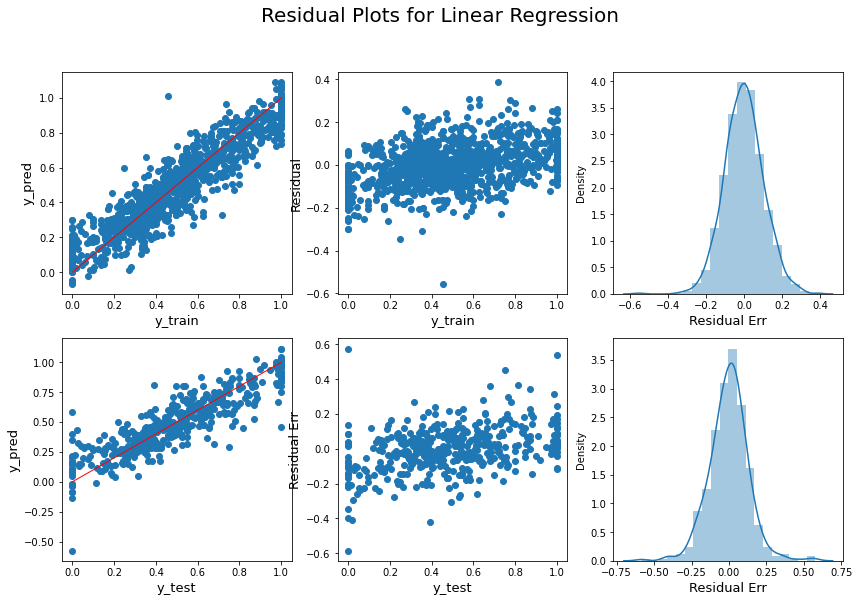

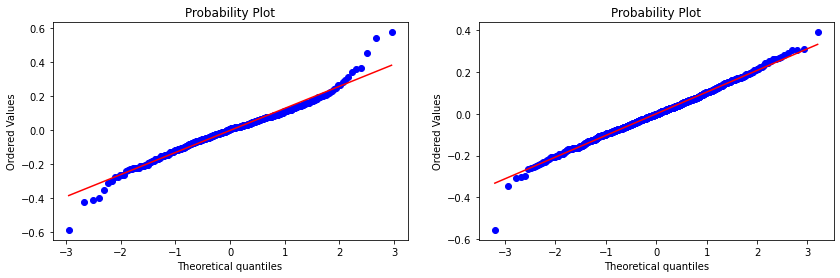

Mean of Reidual -1.1094618531097427e-15
Standard Deviation of Residual 0.104
RErrSkew(Test)= 0.05513441775429963
RErrSkew(Train)= -0.027767044762702996
RErrKurt(Test)= 2.4831274438080824
RErrKurt(Train)= 0.9199820817866691


In [435]:
### Surviving Columns based on the RFE Linear Regression
Surv_Col = X_train_new.drop('const',axis=1).columns

# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train[Surv_Col], y_train)
y_pred_train = lm.predict(X_train[Surv_Col])
y_pred_test = lm.predict(X_test[Surv_Col])

metric = [0]
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2Score(Training) =",r2_train_lr)
metric.append(r2_train_lr.round(3))

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2Score(Test)     =",r2_test_lr)
metric.append(r2_test_lr.round(3))

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS(Train)        =",rss1_lr**0.5)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS(Test)         =",rss2_lr**0.5)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("RMSE(Train)        =",mse_train_lr**0.5)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("RMSE(Test)         =",mse_test_lr**0.5)
metric.append(mse_test_lr**0.5)


#### Plots for the Linear Regression


fig = plt.figure(figsize = (14, 9))
plt.subplot(2,3,1)
Y_max = y_train.max()
Y_min = y_train.min()
plt.scatter(y_train,y_pred_train)
fig.suptitle('y_train vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=13)                          # X-label
plt.ylabel('y_pred', fontsize=13)         
X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.subplot(2,3,2)
plt.scatter(y_train,(y_train - y_pred_train))
fig.suptitle('y_train vs Residual', fontsize=15)              # Plot heading 
plt.xlabel('y_train', fontsize=13)                          # X-label
plt.ylabel('Residual', fontsize=13)    

# Plot the histogram of the error terms
plt.subplot(2,3,3)
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 13)                  # Plot heading 
plt.xlabel('Residual Err', fontsize = 13)                         # X-label



plt.subplot(2,3,4)
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=13)                          # X-label
plt.ylabel('y_pred', fontsize=13)         
plt.subplot(2,3,4)
Y_max = y_test.max()
Y_min = y_test.min()
X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.subplot(2,3,5)
plt.scatter(y_test,(y_test - y_pred_test))
fig.suptitle('y_test vs Residual', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=13)                          # X-label
plt.ylabel('Residual Err', fontsize=13)    
# Plot the histogram of the error terms
plt.subplot(2,3,6)
sns.distplot((y_test - y_pred_test), bins = 20)
fig.suptitle('Residual Plots for Linear Regression', fontsize = 20)                  # Plot heading 
plt.xlabel('Residual Err', fontsize = 13)                         # X-label


fig = plt.figure(figsize = (14, 4))
plt.subplot(1,2,1)
stats.probplot((y_test - y_pred_test), dist="norm", plot=pylab)
plt.subplot(1,2,2)
stats.probplot((y_train - y_pred_train), dist="norm", plot=pylab)
pylab.show()
print("Mean of Reidual",mu)
print("Standard Deviation of Residual",std.round(3))


print("RErrSkew(Test)=",(y_test - y_pred_test).skew())
print("RErrSkew(Train)=",(y_train - y_pred_train).skew())

print("RErrKurt(Test)=",(y_test - y_pred_test).kurt())
print("RErrKurt(Train)=",(y_train - y_pred_train).kurt())

In [436]:
print("#Surviving Features in LR=",lm.n_features_in_)

#Surviving Features in LR= 57


In [437]:
np.append(lm.feature_names_in_,'K')


array(['BsmtFullBath', 'HalfBath', 'Fireplaces', 'WoodDeckSF',
       'OpenPorchSF', 'MSSubClass_160', 'MSSubClass_20',
       'LotConfig_CulDSac', 'Neighborhood_ClearCr',
       'Neighborhood_Crawfor', 'Neighborhood_MeadowV',
       'Neighborhood_NAmes', 'Neighborhood_Somerst', 'Condition2_PosN',
       'BldgType_TwnhsE', 'OverallQual_2', 'OverallQual_3',
       'OverallQual_4', 'OverallQual_5', 'OverallQual_6', 'OverallQual_7',
       'OverallQual_9', 'OverallCond_3', 'YearBuilt_1880',
       'YearBuilt_1898', 'YearBuilt_1910', 'YearBuilt_1920',
       'YearBuilt_1924', 'YearBuilt_1925', 'YearBuilt_1926',
       'YearBuilt_1931', 'YearBuilt_1935', 'YearBuilt_1938',
       'YearBuilt_1940', 'YearBuilt_1987', 'YearBuilt_2005',
       'YearBuilt_2006', 'YearBuilt_2007', 'YearBuilt_2009',
       'YearRemodAdd_1995', 'YearRemodAdd_1999', 'YearRemodAdd_2000',
       'Exterior1st_BrkFace', 'MasVnrType_BrkFace', 'BsmtCond_Po',
       'BsmtExposure_Gd', 'BsmtFinType1_Unf', 'KitchenQual_Fa',
 

In [438]:

lreg=pd.DataFrame(index = np.append(lm.feature_names_in_,'K')) 
lreg['LinearReg'] = np.append(lm.coef_,lm.intercept_)
lreg=lreg.sort_values(by=['LinearReg'],key=abs,ascending=False)
lreg.head(7)



LinearReg
BsmtCond_Po      -0.668176
K                 0.578095
OverallQual_3    -0.462437
OverallQual_2    -0.453495
OverallQual_4    -0.403082
Condition2_PosN  -0.402971
OverallQual_5    -0.335804

 [Back to Ridge Regression](#6.1)
 
 [Back to Linear  Regression with Surviving Parameters](#6.01)

###  6.1 <a id="6.1"> Ridge Regression</a>

[Back to TOC](#0)


In [439]:
hsingdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 535 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(11), int64(15), uint8(509)
memory usage: 1022.4 KB


In [440]:

np.random.seed(0)
df_train, df_test = train_test_split(hsingdf, train_size = 0.7, test_size = 0.3, random_state = 100)
# Include All the Housing Columns
X = hsingdf.drop('SalePrice',axis=1)
y = hsingdf['SalePrice'] # response variable in Y

## Scaling for Training Data
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = df_train.select_dtypes(['float64','int64']).columns
if EnMinMaxScaleForY==1:
    df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
else:
    df_train[num_vars.drop('SalePrice')] = scaler.fit_transform(df_train[num_vars.drop('SalePrice')])

df_train[num_vars].describe() 

## Scaling for Testing Data
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
if EnMinMaxScaleForY==1:
    df_test[num_vars] = scaler.transform(df_test[num_vars])
else:
    df_test[num_vars.drop('SalePrice')] = scaler.transform(df_test[num_vars.drop('SalePrice')])

y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test


In [441]:
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

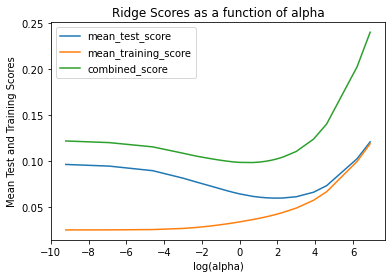

In [442]:
ax = plt.gca()
ax.plot(np.log(params['alpha']), abs(model_cv.cv_results_['mean_test_score']))
ax.plot(np.log(params['alpha']), abs(model_cv.cv_results_['mean_train_score']))
ax.plot(np.log(params['alpha']), abs(model_cv.cv_results_['mean_test_score'])+abs(model_cv.cv_results_['mean_train_score']))


#ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('log(alpha)')
plt.ylabel('Mean Test and Training Scores')
plt.title('Ridge Scores as a function of alpha');
plt.legend(["mean_test_score", "mean_training_score","combined_score"])



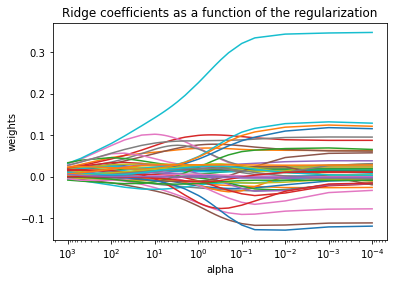

In [443]:
import matplotlib.pyplot as plt


coefs = []
for a in params['alpha']:
    pltridge = Ridge(alpha=a, fit_intercept=False)
    pltridge.fit(X_train, y_train)
    coefs.append(pltridge.coef_)

ax = plt.gca()
ax.plot(params['alpha'], np.transpose(np.transpose(coefs)[0:55]))
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [444]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)
model_cv.best_params_.get("alpha")

{'alpha': 7.0}


7.0

In [445]:
#Fitting Ridge model for alpha = 10 and printing coefficients which have been penalised
if (ForceLasRidScale ==  1):
    Sc = RegularizationScale #Assignment-II,Q1
else:
    Sc = 1
    
alpha = model_cv.best_params_.get("alpha")*Sc;
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_.shape)
ridge.feature_names_in_.shape

(534,)


(534,)

R2Score(Training) = 0.952821002534582
R2Score(Test)     = 0.8987645037240249
RSS(Train)        = 3.5041636626119486
RSS(Test)         = 3.178369392796299
RMSE(Train)        = 0.05858404029502303
RMSE(Test)         = 0.08518539267448208


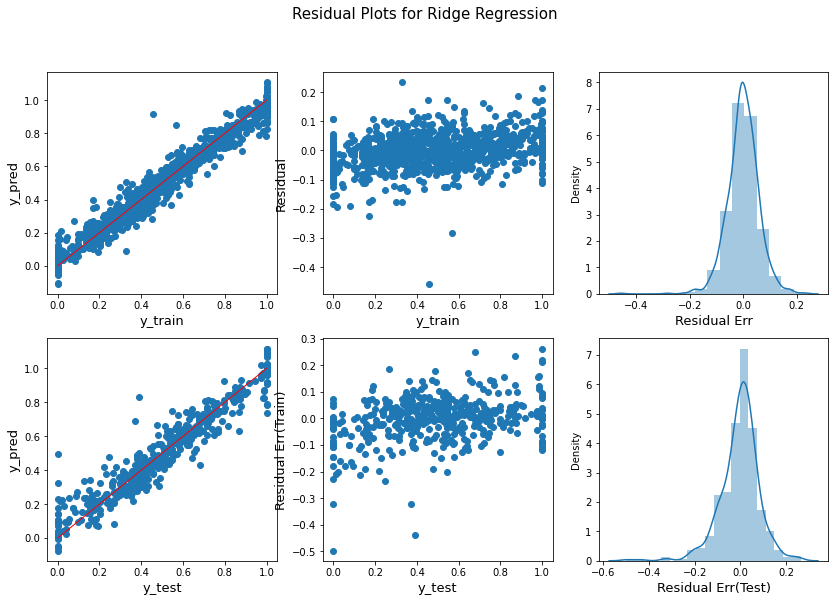

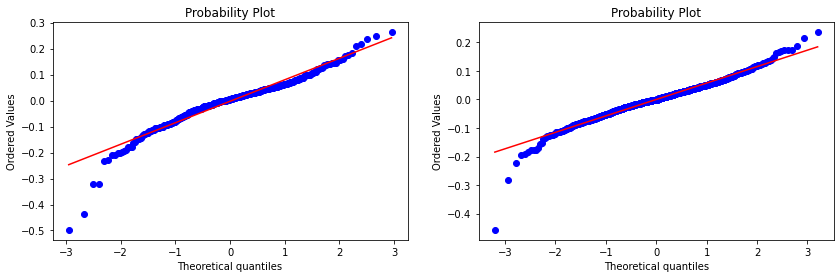

RErrSkew(Test)= -0.9956133955586163
RErrSkew(Train)= -0.5621456755885426
RErrKurt(Test)= 4.691207590207074
RErrKurt(Train)= 4.7605071288309215


In [446]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = [alpha]
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2Score(Training) =",r2_train_lr)
metric2.append(r2_train_lr.round(3))

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2Score(Test)     =",r2_test_lr)
metric2.append(r2_test_lr.round(3))

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS(Train)        =",rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS(Test)         =",rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("RMSE(Train)        =",mse_train_lr**0.5)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("RMSE(Test)         =",mse_test_lr**0.5)
metric2.append(mse_test_lr**0.5)



#### Plots for the Ridge Regression


fig = plt.figure(figsize = (14,9))
plt.subplot(2,3,1)
Y_max = y_train.max()
Y_min = y_train.min()
plt.scatter(y_train,y_pred_train)
fig.suptitle('y_train vs y_pred', fontsize=15)              # Plot heading 
plt.xlabel('y_train', fontsize=13)                          # X-label
plt.ylabel('y_pred', fontsize=13)         
X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.subplot(2,3,2)
plt.scatter(y_train,(y_train - y_pred_train))
fig.suptitle('y_train vs Residual', fontsize=15)              # Plot heading 
plt.xlabel('y_train', fontsize=13)                          # X-label
plt.ylabel('Residual', fontsize=13)    

# Plot the histogram of the error terms
plt.subplot(2,3,3)
sns.distplot((y_train - y_pred_train), bins = 15)
fig.suptitle('Error Terms', fontsize = 13)                  # Plot heading 
plt.xlabel('Residual Err', fontsize = 13)                         # X-label


plt.subplot(2,3,4)
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=13)                          # X-label
plt.ylabel('y_pred', fontsize=13)         
plt.subplot(2,3,4)
Y_max = y_test.max()
Y_min = y_test.min()
X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.subplot(2,3,5)
plt.scatter(y_test,(y_test - y_pred_test))
fig.suptitle('y_test vs Residual', fontsize=15)              # Plot heading 
plt.xlabel('y_test', fontsize=13)                          # X-label
plt.ylabel('Residual Err(Train)', fontsize=13)    
# Plot the histogram of the error terms
plt.subplot(2,3,6)
sns.distplot((y_test - y_pred_test), bins = 20)
fig.suptitle('Residual Plots for Ridge Regression', fontsize = 15)                  # Plot heading 
plt.xlabel('Residual Err(Test)', fontsize = 13)                         # X-label

import numpy as np 

fig = plt.figure(figsize = (14, 4))
plt.subplot(1,2,1)
stats.probplot((y_test - y_pred_test), dist="norm", plot=pylab)
plt.subplot(1,2,2)
stats.probplot((y_train - y_pred_train), dist="norm", plot=pylab)
pylab.show()

print("RErrSkew(Test)=",(y_test - y_pred_test).skew())
print("RErrSkew(Train)=",(y_train - y_pred_train).skew())

print("RErrKurt(Test)=",(y_test - y_pred_test).kurt())
print("RErrKurt(Train)=",(y_train - y_pred_train).kurt())

 [Back to Ridge Regression](#6.1)
 
 [Back to Linear  Regression with Surviving Parameters](#6.01)

###  6.2 <a id="6.2"> Lasso Regression</a>

[Back to TOC](#0)


In [447]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 0.0001}


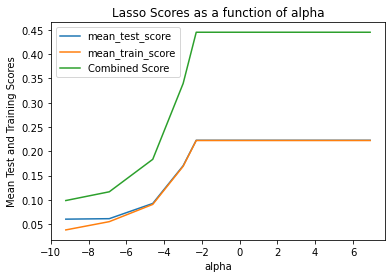

In [448]:
ax = plt.gca()
ax.plot(np.log(params['alpha']), abs(model_cv.cv_results_['mean_test_score']))
ax.plot(np.log(params['alpha']), abs(model_cv.cv_results_['mean_train_score']))
ax.plot(np.log(params['alpha']), abs((model_cv.cv_results_['mean_test_score'])+(model_cv.cv_results_['mean_train_score'])))


#ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Mean Test and Training Scores')
plt.title('Lasso Scores as a function of alpha');
plt.legend(["mean_test_score", "mean_train_score","Combined Score"])


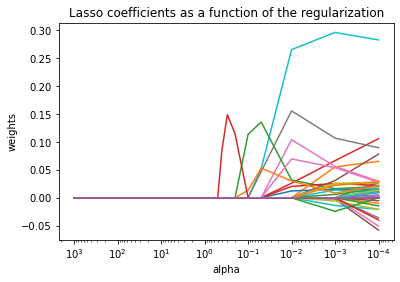

In [449]:
import matplotlib.pyplot as plt

coefs = []
for a in params['alpha']:
    pltridge = Lasso(alpha=a, fit_intercept=False)
    pltridge.fit(X_train, y_train)
    coefs.append(pltridge.coef_)

ax = plt.gca()
ax.plot(params['alpha'], np.transpose(np.transpose(coefs)[0:55]))
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()


In [450]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
if (ForceLasRidScale ==  1):
    Sc = RegularizationScale #Assignment-II,Q1
else:
    Sc = 1
alpha = model_cv.best_params_.get("alpha")*Sc
lasso = Lasso(alpha=alpha)        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.0001)

R2Score(Training) = 0.9587947511871026
R2Score(Test)     = 0.8897580581549683
RSS(Train)        = 3.060470619471652
RSS(Test)         = 3.4611339564878656
RMSE(Train)        = 0.05474963601658671
RMSE(Test)         = 0.0888939386052196


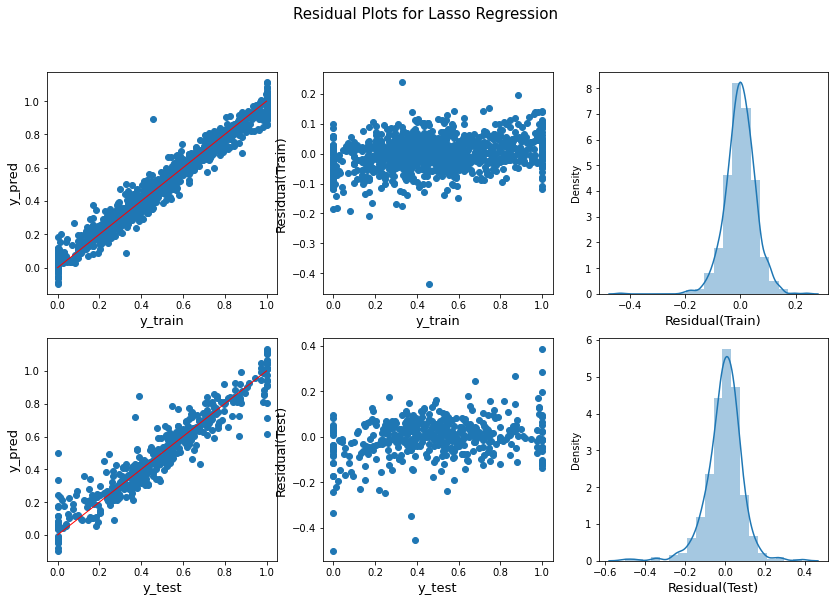

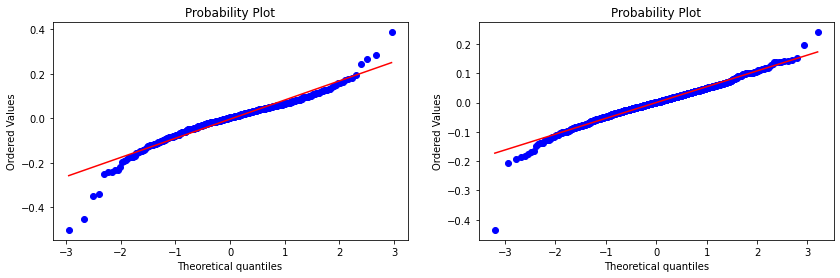

Mean of Reidual -1.1094618531097427e-15
Standard Deviation of Residual 0.104
RErrSkew(Test)= -0.8349462156074533
RErrSkew(Train)= -0.5679124294692987
RErrKurt(Test)= 5.053904410743263
RErrKurt(Train)= 4.566073765369854


In [451]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso.predict(X_train)
y_pred_test = lasso.predict(X_test)

metric3 = [alpha]
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2Score(Training) =",r2_train_lr)
metric3.append(r2_train_lr.round(3))

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2Score(Test)     =",r2_test_lr)
metric3.append(r2_test_lr.round(3))

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS(Train)        =",rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS(Test)         =",rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("RMSE(Train)        =",mse_train_lr**0.5)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("RMSE(Test)         =",mse_test_lr**0.5)
metric3.append(mse_test_lr**0.5)



#### Plots for the Lasso Regression

fig = plt.figure(figsize = (14, 9))
plt.subplot(2,3,1)
Y_max = y_train.max()
Y_min = y_train.min()
plt.scatter(y_train,y_pred_train)
fig.suptitle('y_train vs y_pred', fontsize=15)              # Plot heading 
plt.xlabel('y_train', fontsize=13)                          # X-label
plt.ylabel('y_pred', fontsize=13)         
X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.subplot(2,3,2)
plt.scatter(y_train,(y_train - y_pred_train))
fig.suptitle('y_train vs Residual', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=13)                          # X-label
plt.ylabel('Residual(Train)', fontsize=13)    

# Plot the histogram of the error terms
plt.subplot(2,3,3)
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 13)                  # Plot heading 
plt.xlabel('Residual(Train)', fontsize = 13)                         # X-label



plt.subplot(2,3,4)
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize=15)              # Plot heading 
plt.xlabel('y_test', fontsize=13)                          # X-label
plt.ylabel('y_pred', fontsize=13)         
plt.subplot(2,3,4)
Y_max = y_test.max()
Y_min = y_test.min()
X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.subplot(2,3,5)
plt.scatter(y_test,(y_test - y_pred_test))
fig.suptitle('y_test vs Residual', fontsize=15)              # Plot heading 
plt.xlabel('y_test', fontsize=13)                          # X-label
plt.ylabel('Residual(Test)', fontsize=13)    
# Plot the histogram of the error terms
plt.subplot(2,3,6)
sns.distplot((y_test - y_pred_test), bins = 20)
fig.suptitle('Residual Plots for Lasso Regression', fontsize = 15)                  # Plot heading 
plt.xlabel('Residual(Test)', fontsize = 13)                         # X-label


fig = plt.figure(figsize = (14, 4))
plt.subplot(1,2,1)
stats.probplot((y_test - y_pred_test), dist="norm", plot=pylab)
plt.subplot(1,2,2)
stats.probplot((y_train - y_pred_train), dist="norm", plot=pylab)
pylab.show()
print("Mean of Reidual",mu)
print("Standard Deviation of Residual",std.round(3))
print("RErrSkew(Test)=",(y_test - y_pred_test).skew())
print("RErrSkew(Train)=",(y_train - y_pred_train).skew())

print("RErrKurt(Test)=",(y_test - y_pred_test).kurt())
print("RErrKurt(Train)=",(y_train - y_pred_train).kurt())

###  6.3 <a id="6.3">  Comparison Summary of 3 Regressions</a>

[Back to TOC](#0)


In [452]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['Regularization','R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'RMSE (Train)','RMSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([ lr_metric,rg_metric, ls_metric], axis = 1)
final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0    Regularization           0.000000          7.000000          0.000100
1  R2 Score (Train)           0.853000          0.953000          0.959000
2   R2 Score (Test)           0.760000          0.899000          0.890000
3       RSS (Train)          10.952758          3.504164          3.060471
4        RSS (Test)           7.527175          3.178369          3.461134
5      RMSE (Train)           0.103574          0.058584          0.054750
6       RMSE (Test)           0.131093          0.085185          0.088894

### TOP 15 Coefficients of Ridge 

In [453]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
#betas['Linear'] = lm.coef_
betas['Ridge'] = ridge.coef_
betas['Lasso'] = lasso.coef_
pd.set_option('display.max_rows', None)
betas.sort_values(by=['Ridge'],ascending=False)
RidgeCoeff = betas.reindex(betas.Ridge.abs().sort_values(ascending=False).index)
Ridge_Predictors = RidgeCoeff.drop('Lasso',axis=1)
Ridge_Predictors.head(5)

Ridge
GrLivArea      0.152796
1stFlrSF       0.100946
OverallQual_9  0.087843
GarageArea     0.083459
BsmtFinSF1     0.080743

### TOP 15 Coefficients of Lasso


In [454]:
LassoCoeff = betas.reindex(betas.Lasso.abs().sort_values(ascending=False).index)
Lasso_Predictors = LassoCoeff.drop('Ridge',axis=1)

Lasso_Predictors.head(5)

Lasso
GrLivArea        0.279500
Condition2_PosN -0.240197
Condition2_PosA  0.159116
OverallQual_9    0.154912
OverallQual_8    0.118378

## 7. <a id="7"> Lasso Regression with Top Predictors removed </a>

[Back to TOC](#0)


In [455]:
## Redoing the Train test split with Removing the top-5 Predictors

In [456]:
np.random.seed(0)
Top5Predictors  = LassoCoeff.drop('Ridge',axis=1).head(5).index.values
df_train, df_test = train_test_split(hsingdf.drop(Top5Predictors,axis=1), train_size = 0.7, test_size = 0.3, random_state = 100)
# Include All the Housing Columns
X = hsingdf.drop('SalePrice',axis=1)
X=X.drop(Top5Predictors,axis=1)
y = hsingdf['SalePrice'] # response variable in Y


## Scaling for Training Data
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = df_train.select_dtypes(['float64','int64']).columns

if EnMinMaxScaleForY==1:
    df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
else:
    df_train[num_vars.drop('SalePrice')] = scaler.fit_transform(df_train[num_vars.drop('SalePrice')])

df_train[num_vars].describe() 

## Scaling for Testing Data
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
if EnMinMaxScaleForY==1:
    df_test[num_vars] = scaler.transform(df_test[num_vars])
else:
    df_test[num_vars.drop('SalePrice')] = scaler.transform(df_test[num_vars.drop('SalePrice')])
y_train = df_train.pop('SalePrice')
X_train = df_train

y_test = df_test.pop('SalePrice')
X_test = df_test
X_train.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=529)

In [457]:
lasso_new = Lasso()
# Remove top predictor variables from X_train and X_test
## Top5 Predictor Variables to be Dropped
# cross validation
model_cv = GridSearchCV(estimator = lasso_new, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
{'alpha': 0.0001}


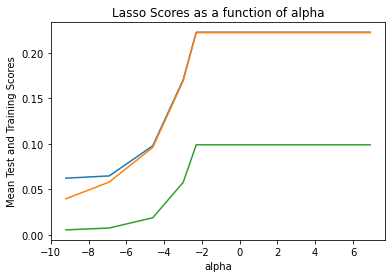

In [458]:
ax = plt.gca()
ax.plot(np.log(params['alpha']), abs(model_cv.cv_results_['mean_test_score']))
ax.plot(np.log(params['alpha']), abs(model_cv.cv_results_['mean_train_score']))
ax.plot(np.log(params['alpha']), (model_cv.cv_results_['mean_test_score'])**2+abs(model_cv.cv_results_['mean_train_score'])**2)


#ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Mean Test and Training Scores')
plt.title('Lasso Scores as a function of alpha');

In [459]:
#Fitting Ridge model for alpha = 100 and printing coefficients which have been penalised
if (ForceLasRidScale ==  1):
    Sc = RegularizationScale #Assignment-II,Q1
else:
    Sc = 1
alpha = model_cv.best_params_.get("alpha")*Sc
lasso_new = Lasso(alpha=alpha)        
lasso_new.fit(X_train, y_train) 

Lasso(alpha=0.0001)

R2Score(Training) = 0.9548539949401728
R2Score(Test)     = 0.8924435473390693
RSS(Train)        = 3.3531655809070773
RSS(Test)         = 3.3768208751931006
RMSE(Train)        = 0.05730791773199202
RMSE(Test)         = 0.08780453690643844


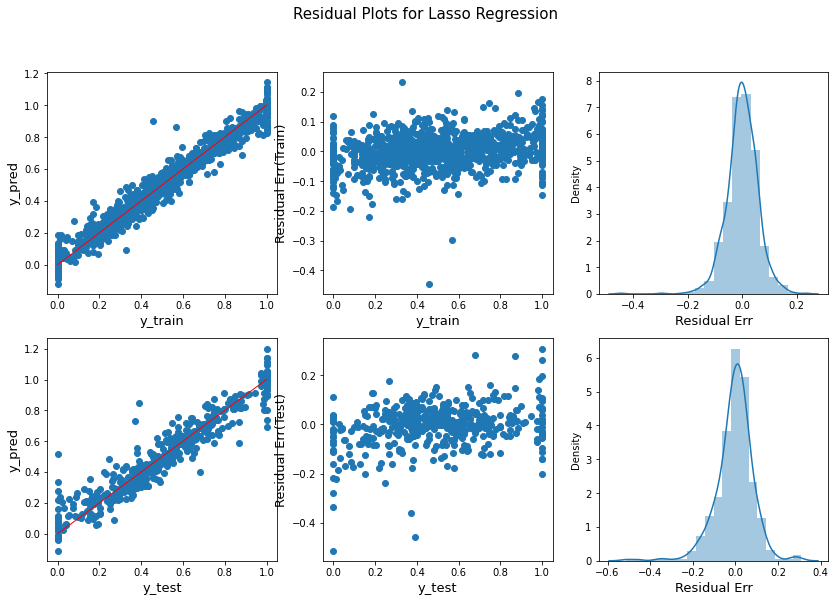

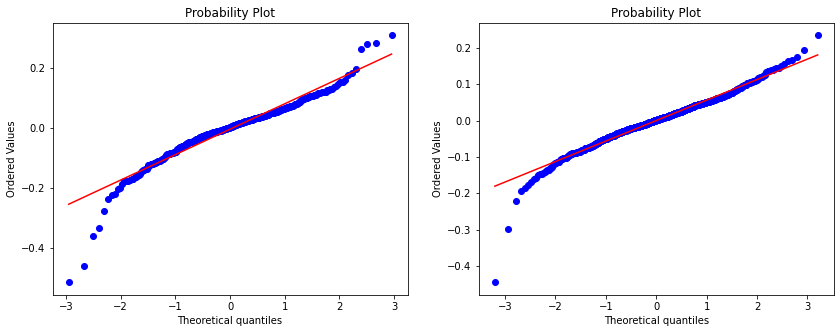

Mean of Reidual -1.1094618531097427e-15
Standard Deviation of Residual 0.104


In [460]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = lasso_new.predict(X_train)
y_pred_test = lasso_new.predict(X_test)

metric4 = [alpha]
r2_train_lr = r2_score(y_train, y_pred_train)
print("R2Score(Training) =",r2_train_lr)
metric4.append(r2_train_lr.round(3))

r2_test_lr = r2_score(y_test, y_pred_test)
print("R2Score(Test)     =",r2_test_lr)
metric4.append(r2_test_lr.round(3))

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print("RSS(Train)        =",rss1_lr)
metric4.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print("RSS(Test)         =",rss2_lr)
metric4.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print("RMSE(Train)        =",mse_train_lr**0.5)
metric4.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print("RMSE(Test)         =",mse_test_lr**0.5)
metric4.append(mse_test_lr**0.5)

#### Plots for the Lasso Regression

fig = plt.figure(figsize = (14, 9))
plt.subplot(2,3,1)
Y_max = y_train.max()
Y_min = y_train.min()
plt.scatter(y_train,y_pred_train)
fig.suptitle('y_train vs y_pred', fontsize=10)              # Plot heading 
plt.xlabel('y_train', fontsize=13)                          # X-label
plt.ylabel('y_pred', fontsize=13)         
X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.subplot(2,3,2)
plt.scatter(y_train,(y_train - y_pred_train))
fig.suptitle('y_train vs Residual', fontsize=20)              # Plot heading 
plt.xlabel('y_train', fontsize=13)                          # X-label
plt.ylabel('Residual Err(Train)', fontsize=13)    

# Plot the histogram of the error terms
plt.subplot(2,3,3)
sns.distplot((y_train - y_pred_train), bins = 20)
fig.suptitle('Error Terms', fontsize = 13)                  # Plot heading 
plt.xlabel('Residual Err', fontsize = 13)                         # X-label



plt.subplot(2,3,4)
plt.scatter(y_test,y_pred_test)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=13)                          # X-label
plt.ylabel('y_pred', fontsize=13)         
plt.subplot(2,3,4)
Y_max = y_test.max()
Y_min = y_test.min()
X_ref = Y_ref = np.linspace(Y_min, Y_max, 100)
plt.plot(X_ref, Y_ref, color='red', linewidth=1)
plt.subplot(2,3,5)
plt.scatter(y_test,(y_test - y_pred_test))
fig.suptitle('y_test vs Residual', fontsize=13)              # Plot heading 
plt.xlabel('y_test', fontsize=13)                          # X-label
plt.ylabel('Residual Err(Test)', fontsize=13)    
# Plot the histogram of the error terms
plt.subplot(2,3,6)
sns.distplot((y_test - y_pred_test), bins = 20)
fig.suptitle('Residual Plots for Lasso Regression', fontsize = 15)                  # Plot heading 
plt.xlabel('Residual Err', fontsize = 13)                         # X-label


fig = plt.figure(figsize = (14,5))
plt.subplot(1,2,1)
stats.probplot((y_test - y_pred_test), dist="norm", plot=pylab)
plt.subplot(1,2,2)
stats.probplot((y_train - y_pred_train), dist="norm", plot=pylab)
pylab.show()
print("Mean of Reidual",mu)
print("Standard Deviation of Residual",std.round(3))

## 9. <a id="9">Summary and Conclusions</a>

[Back to TOC](#0)

 $\;\;\;$[<font size="1.5">Click here to set lin-reg configs</font>](#1.1)
 
 
  [Back to Ridge Regression](#6.1)
 
 [Back to Linear  Regression with Surviving Parameters](#6.01)
 
### FINAL MODELS and RESULTS



In [461]:
# Creating a table which contain all the metrics

lr_table = {'Metric': ['Regularization','R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'RMSE (Train)','RMSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')
ls2_metric = pd.Series(metric4, name = 'Lasso_Top_Pred_Elim')

final_metric = pd.concat([ lr_metric,rg_metric, ls_metric,ls2_metric], axis = 1)
final_metric


Metric  Linear Regression  Ridge Regression  Lasso Regression  \
0    Regularization           0.000000          7.000000          0.000100   
1  R2 Score (Train)           0.853000          0.953000          0.959000   
2   R2 Score (Test)           0.760000          0.899000          0.890000   
3       RSS (Train)          10.952758          3.504164          3.060471   
4        RSS (Test)           7.527175          3.178369          3.461134   
5      RMSE (Train)           0.103574          0.058584          0.054750   
6       RMSE (Test)           0.131093          0.085185          0.088894   

   Lasso_Top_Pred_Elim  
0             0.000100  
1             0.955000  
2             0.892000  
3             3.353166  
4             3.376821  
5             0.057308  
6             0.087805

In [462]:
betas = pd.DataFrame(index=X.columns)
betas.rows = X.columns
print(lasso_new.coef_.shape)
betas['Lasso_Top_Pred_Elim'] = lasso_new.coef_
pd.set_option('display.max_rows', None)
Lasso_NewPred=betas.sort_values(by=['Lasso_Top_Pred_Elim'],key=abs,ascending=False)

(529,)


In [463]:
import pandas as pd   
from IPython.display import display_html 
nF = 50

print("Number of Features in Linear Regresion = ",lm.n_features_in_)
print("Intercept for LinearReg = ",lm.intercept_.round(3))
print("Intercept for Ridge     = ",ridge.intercept_.round(3))
print("Intercept for Lasso     = ",lasso.intercept_.round(3))
print("Intercept for Lasso_With_Top_Predictors_Eliminated=",lasso_new.intercept_.round(3))
print("TOP FEATURES",nF)
print("-----------------")
df1_styler = lreg.drop('K',axis=0).round(3).head(nF).style.set_table_attributes("style='display:inline'").set_caption('Linear Regression')
df2_styler = Ridge_Predictors.round(3).head(nF).style.set_table_attributes("style='display:inline'").set_caption('Ridge')
df3_styler = Lasso_Predictors.round(3).head(nF).style.set_table_attributes("style='display:inline'").set_caption('Lasso')
df4_styler = Lasso_NewPred.round(3).head(nF).style.set_table_attributes("style='display:inline'").set_caption('Lasso_New (Eliminating top 5 Predictors)')
display_html(df1_styler._repr_html_()+df2_styler._repr_html_()+df3_styler._repr_html_()+df4_styler._repr_html_(), raw=True)

Number of Features in Linear Regresion =  57
Intercept for LinearReg =  0.578
Intercept for Ridge     =  -0.041
Intercept for Lasso     =  -0.17
Intercept for Lasso_With_Top_Predictors_Eliminated= -0.067
TOP FEATURES 50
-----------------


Linear Regression 
 
 
   
 LinearReg 
 
 
 
 
 BsmtCond_Po 
 -0.668000 
 
 
 OverallQual_3 
 -0.462000 
 
 
 OverallQual_2 
 -0.453000 
 
 
 OverallQual_4 
 -0.403000 
 
 
 Condition2_PosN 
 -0.403000 
 
 
 OverallQual_5 
 -0.336000 
 
 
 YearBuilt_1880 
 0.311000 
 
 
 YearBuilt_1898 
 -0.300000 
 
 
 OverallQual_6 
 -0.272000 
 
 
 YearBuilt_1987 
 0.262000 
 
 
 GarageYrBlt_1910 
 0.212000 
 
 
 YearBuilt_1931 
 -0.210000 
 
 
 YearBuilt_1935 
 -0.185000 
 
 
 YearBuilt_1938 
 -0.168000 
 
 
 MSSubClass_160 
 -0.149000 
 
 
 OverallQual_7 
 -0.148000 
 
 
 Neighborhood_MeadowV 
 -0.139000 
 
 
 YearBuilt_1924 
 -0.136000 
 
 
 YearBuilt_1926 
 -0.135000 
 
 
 Neighborhood_Crawfor 
 0.128000 
 
 
 OverallQual_9 
 0.114000 
 
 
 GarageType_CarPort 
 -0.113000 
 
 
 Fireplaces 
 0.111000 
 
 
 OverallCond_3 
 -0.108000 
 
 
 GarageYrBlt_1997 
 0.108000 
 
 
 Neighborhood_ClearCr 
 0.100000 
 
 
 YearBuilt_1940 
 -0.099000 
 
 
 YearBuilt_2009 
 0.098000 
 
 
 YearBuilt_1910 
 -0.094000 
 
 
 YearRemodAdd_1999 
 0.092000 
 
 
 YearBuilt_1925 
 -0.086000 
 
 
 Exterior1st_BrkFace 
 0.083000 
 
 
 YearBuilt_2007 
 0.082000 
 
 
 YearBuilt_1920 
 -0.079000 
 
 
 HalfBath 
 0.077000 
 
 
 YearBuilt_2005 
 0.068000 
 
 
 GarageYrBlt_2004 
 0.068000 
 
 
 YearRemodAdd_1995 
 0.068000 
 
 
 GarageYrBlt_2008 
 0.067000 
 
 
 KitchenQual_Fa 
 -0.065000 
 
 
 WoodDeckSF 
 0.064000 
 
 
 YearBuilt_2006 
 0.059000 
 
 
 OpenPorchSF 
 0.058000 
 
 
 YearRemodAdd_2000 
 0.054000 
 
 
 GarageYrBlt_2003 
 0.048000 
 
 
 BsmtExposure_Gd 
 0.047000 
 
 
 LotConfig_CulDSac 
 0.046000 
 
 
 Neighborhood_Somerst 
 0.046000 
 
 
 BldgType_TwnhsE 
 -0.041000 
 
 
 BsmtFinType1_Unf 
 -0.041000 
 
 
 

 
 Ridge 
 
 
   
 Ridge 
 
 
 
 
 GrLivArea 
 0.153000 
 
 
 1stFlrSF 
 0.101000 
 
 
 OverallQual_9 
 0.088000 
 
 
 GarageArea 
 0.083000 
 
 
 BsmtFinSF1 
 0.081000 
 
 
 OverallQual_8 
 0.077000 
 
 
 2ndFlrSF 
 0.071000 
 
 
 LotArea 
 0.061000 
 
 
 Neighborhood_Crawfor 
 0.061000 
 
 
 BsmtUnfSF 
 0.060000 
 
 
 OverallQual_4 
 -0.055000 
 
 
 Neighborhood_MeadowV 
 -0.054000 
 
 
 OverallCond_9 
 0.054000 
 
 
 Neighborhood_Edwards 
 -0.053000 
 
 
 Neighborhood_ClearCr 
 0.050000 
 
 
 YearBuilt_1900 
 -0.050000 
 
 
 GarageYrBlt_2008 
 0.049000 
 
 
 OverallQual_3 
 -0.048000 
 
 
 Neighborhood_Somerst 
 0.045000 
 
 
 CentralAir_Y 
 0.043000 
 
 
 OverallCond_3 
 -0.042000 
 
 
 SaleType_ConLD 
 0.042000 
 
 
 Functional_Typ 
 0.042000 
 
 
 Exterior1st_BrkFace 
 0.041000 
 
 
 Condition2_PosN 
 -0.041000 
 
 
 Neighborhood_StoneBr 
 0.039000 
 
 
 Fireplaces 
 0.039000 
 
 
 Neighborhood_NridgHt 
 0.039000 
 
 
 MSSubClass_160 
 -0.037000 
 
 
 GarageType_CarPort 
 -0.036000 
 
 
 BsmtQual_TA 
 -0.034000 
 
 
 YearRemodAdd_2000 
 0.034000 
 
 
 Condition1_Norm 
 0.033000 
 
 
 BsmtCond_Gd 
 0.033000 
 
 
 Neighborhood_NAmes 
 -0.033000 
 
 
 OverallQual_7 
 0.033000 
 
 
 GarageQual_Fa 
 -0.033000 
 
 
 OverallCond_8 
 0.033000 
 
 
 KitchenQual_Fa 
 -0.033000 
 
 
 GarageQual_Gd 
 0.032000 
 
 
 OverallQual_10 
 -0.032000 
 
 
 MSSubClass_180 
 -0.031000 
 
 
 FullBath 
 0.031000 
 
 
 OverallCond_4 
 -0.031000 
 
 
 Condition2_PosA 
 0.031000 
 
 
 YearBuilt_1893 
 0.031000 
 
 
 KitchenQual_TA 
 -0.030000 
 
 
 WoodDeckSF 
 0.030000 
 
 
 BsmtExposure_Gd 
 0.030000 
 
 
 MSSubClass_30 
 -0.030000 
 
 
 

 
 Lasso 
 
 
   
 Lasso 
 
 
 
 
 GrLivArea 
 0.279000 
 
 
 Condition2_PosN 
 -0.240000 
 
 
 Condition2_PosA 
 0.159000 
 
 
 OverallQual_9 
 0.155000 
 
 
 OverallQual_8 
 0.118000 
 
 
 OverallCond_9 
 0.114000 
 
 
 BsmtFinSF1 
 0.111000 
 
 
 YearBuilt_1900 
 -0.105000 
 
 
 Neighborhood_MeadowV 
 -0.104000 
 
 
 YearBuilt_1932 
 0.103000 
 
 
 YearBuilt_1987 
 0.100000 
 
 
 GarageArea 
 0.094000 
 
 
 Heating_OthW 
 -0.093000 
 
 
 SaleType_ConLD 
 0.093000 
 
 
 Neighborhood_ClearCr 
 0.089000 
 
 
 BsmtUnfSF 
 0.080000 
 
 
 Neighborhood_Crawfor 
 0.077000 
 
 
 LotArea 
 0.068000 
 
 
 Functional_Maj2 
 -0.067000 
 
 
 Overal

### Conclusions 

#### MULTIPLE MODELS  $\;\;\;$[<font size="2">Setting Configurations</font>](#1.1)

Multiple Model options were tried with various configurations for Linear,Ridge and Lasso Regression
- Model-1 Min-Max Scaling for Target and Predictor Variables,Log Transformation for Target Variable
- Model-2 Min Max scalinhg for Target and Predictor Variables,Log Transformation for Target Variable,Doubling of Optimal Regularization parameters obtained for Lasso and Ridge
- Model-3 Min-Max Scaling applied for Predictor Variables only,Log transformation of Target Variable
- Model-4 Min-Max Scaling applied for Predictor Variables,No Transformation of Target Variable
- Model-5 Min-Max Scaling applied for Predictor Variables+ Target Variable , No Transformation of Target Variable

Lasso Regression was also tried with elimination of the top-5 predictors for each Model

In some of the models the log transformationm on the target variable was perfomed  as the target variable showed some skewness in its distribution


##### <a id="9.01">Model-1</a>


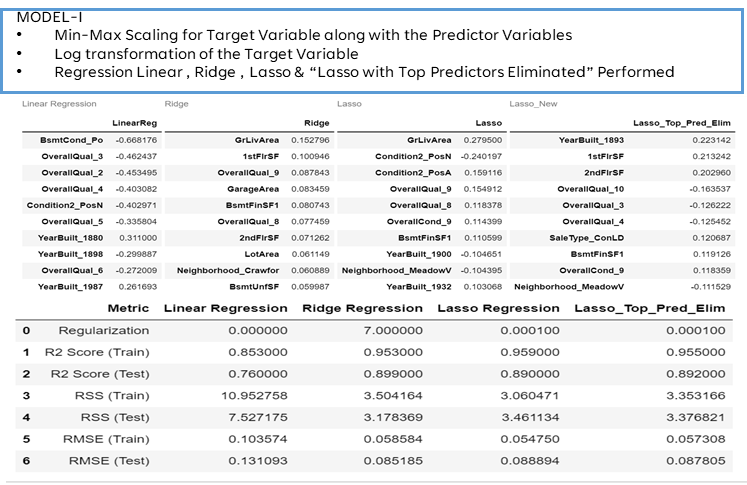

- GrLivArea,Condition2_PosN,Condition2_PosA,OverallQual_8,OverallQual_9 are the top predictors with Lasso Regression
- After Eliminating this variables new variables obtained from the Lasso Model are YearBuilt_1893, 1stFlrSF, 2ndFlrSF, OverallQual_10, OverallQual_3
- GrLivArea,GarageArea,1stFlrSF,OverallQual_9,BsmntFinSF1 are the top-5 Predictors for Ridge Regression
- Optimal Regularization alpha is  7 for ridge and 1e-04 for Lasso Regressions
- Ridge seems to be a Marginaly better in terms of generalization as difference in R2_Score,Residual-erros between test and training data 
- Lasso regression also gives higher RMSE with test data
- Marginal RMSE degradation with Lasso regression when top-5 predictor variables eliminated.(Compared to Lasso with those predictor variables)


##### <a id="9.02">Model-2</a>


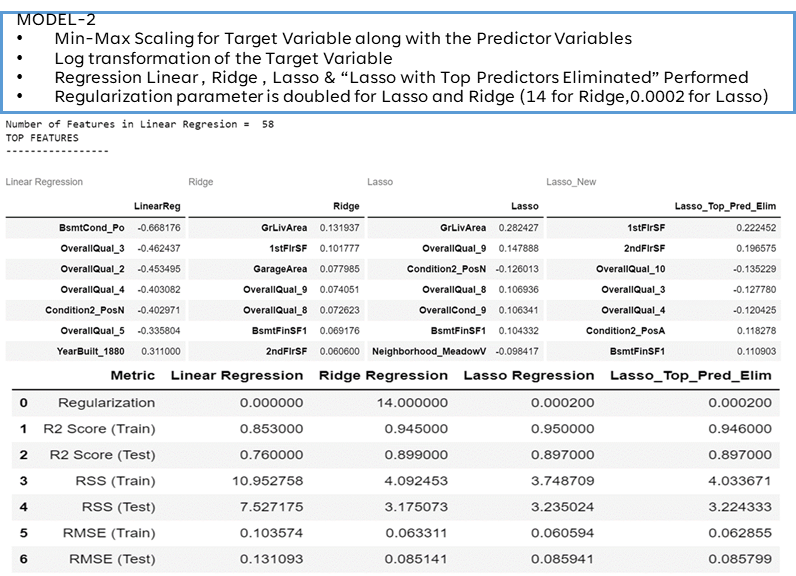

- GrLivArea,Condition2_PosN,BsmtFinSF1,OverallQual_8,OverallQual_9 are the top variables with Lasso Regression
- After Eliminating this variables new variables obtained from the Lasso Model are  1stFlrSF, 2ndFlrSF, OverallQual_10, OverallQual_3,OverallQual_4
- GrLivArea,GarageArea,1stFlrSF,OverallQual_9,OverallQual_8 are the top-5 Predictors for Ridge Regression
- Ridge seems to be a Marginaly better in terms of generalization as difference in R2_Score,Residual-erros between test and training data 

- Regularization values are doubled to 14 and 2e-04 for Ridge and Lasso respectively



##### <a id="9.03">Model-3</a>


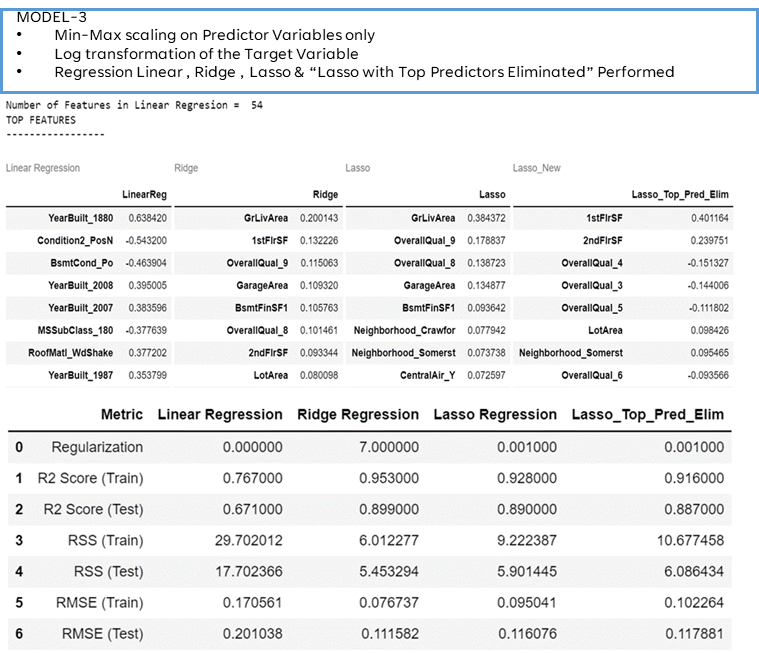

- GrLivArea,GarageArea,BsmtFinSF1,OverallQual_8,OverallQual_9 are the top variables with Lasso Regression
- After Eliminating this variables new variables obtained from the Lasso Model are  1stFlrSF, 2ndFlrSF, OverallQual_5, OverallQual_3,OverallQual_4
- GrLivArea,GarageArea,1stFlrSF,OverallQual_9,BsmtFinSF1 are the top-5 Predictors for Ridge Regression
- Ridge seems to be a  better in terms of generalization as difference in R2_Score,Residual-erros between test and training data 
- Optimal Regularization values  7 and 1e-04 for Ridge and Lasso respectively



##### <a id="9.04">Model-4</a>


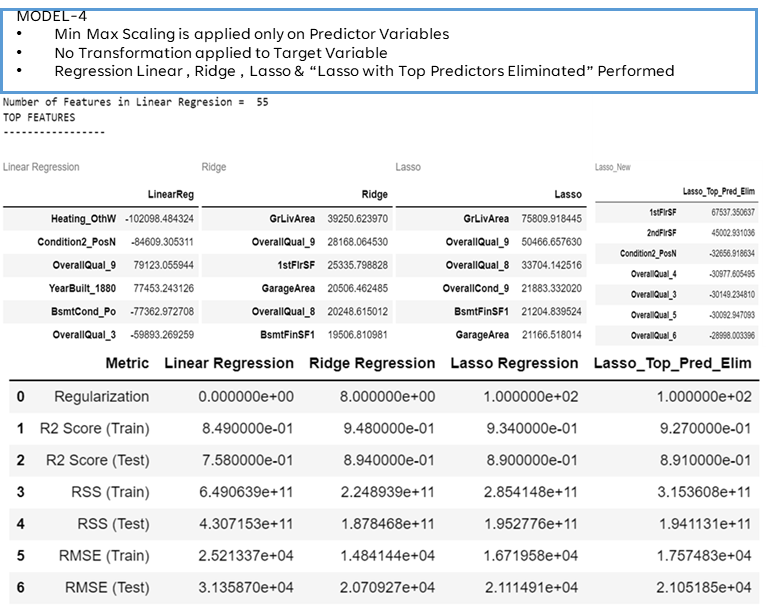

- GrLivArea,GarageArea,BsmtFinSF1,OverallQual_8,OverallCond_9 are the top variables with Lasso Regression
- After Eliminating this variables new variables obtained from the Lasso Model are  1stFlrSF, 2ndFlrSF, Condition2_PosN, OverallQual_3,OverallQual_4
- GrLivArea,GarageArea,1stFlrSF,OverallQual_9,BsmtFinSF1 are the top-5 Predictors for Ridge Regression
- Ridge and Lasso seem to be very close in their scores.
- Optimal Regularization values are 8 and 100 for Ridge and Lasso respectively


##### <a id="9.05">Model-5</a>


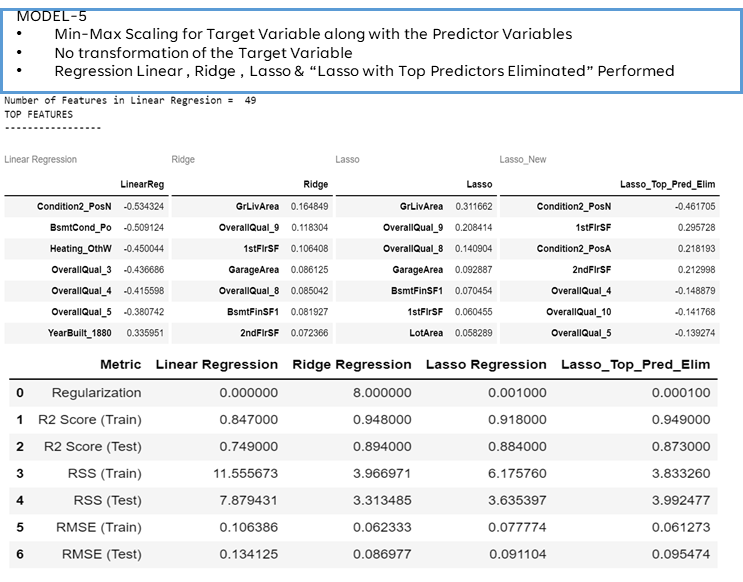

- GrLivArea,GarageArea,BsmtFinSF1,OverallQual_8,OverallQual_9 are the top variables with Lasso Regression
- After Eliminating this variables new variables obtained from the Lasso Model are  1stFlrSF, 2ndFlrSF, Condition2_PosN, OverallQual_3,Condition2_PosA
- GrLivArea,GarageArea,1stFlrSF,OverallQual_9,OverallQual_8 are the top-5 Predictors for Ridge Regression
- Ridge seems to be performing marginally better in R2-Scores and the difference in the Residuals of Train and test data
- Optimal Regularization values are 8 and 100 for Ridge and Lasso respectively


### Across Models Inferences

-  3-4 Predictors among the Top-5 Predictors found  to be mostly same across all the Model Variations for Lasso Regression.(GrLivArea,GarageArea,OverallQual_8,OverallQual_9)
- 3-4 Predictors among the Top-5 Predictors  found to be mostly same across all the Model Variations for Ridge Regression
(GrLivArea,1stFlrSF,OverallQual_8,OverallQual_9)
- 3 Predictors among the Top-5 Predictors are mostly same between Ridge and Lasso Regression for most of the Models



## 10. <a id="10">Assignment Part-II : Subjective Questions</a>

[Back to TOC](#0)

#####  Observations after doubling the Optimal Regularization parameter  (Model-1 and Model-2)

<div class="alert alert-block alert-danger">
<b><font size="4">Question 1:<font size="4"></b><font size="3.5"> What is the optimal value of alpha for ridge and lasso regression? What will be the changes in the model if you choose to double the value of alpha for both ridge and lasso? What will be the most important predictor variables after the change is implemented?</font>
</div>



 

- Optimal alpha for Ridge = 7, Optimal value for Lasso = 0.0001 (Target variable is log transformed and min-max scaled)
- With the alpha doubled there is degradation seen in R2-score of Ridge and Lasso
- With alpha doubling the RSS/RMSE of Ridge and Lasso regression degraded for training data,but improved for test-data.This implies that increasing the regularization factor is improving the generalization by trading of  residual errors in training data by improving it in test-data.
- GrLivArea,Condition2_PosN,Condition2_PosA,OverallQual_8,OverallQual_9 are the top predictors with Lasso Regression with alpha
- GrLivArea,Condition2_PosN,BsmtFinSF1,OverallQual_8,OverallQual_9 are the top variables with Lasso Regression with alpha*2
- GrLivArea,GarageArea,1stFlrSF,OverallQual_9,BsmntFinSF1 are the top-5 Predictors for Ridge Regression for alpha
- GrLivArea,GarageArea,1stFlrSF,OverallQual_9,OverallQual_8 are the top-5 Predictors for Ridge Regression for alpha*2
- 3 to 4 predictors  in the top-5 predictor variables dont seem to change with the modification of regularization factors by a factor of 2, both in Lasso as well as ridge regression
- The Ridge and Lasso Columns in the following table indicate the top-most feature variables along with coefficients when the regularization value or the alpha value is doubled.




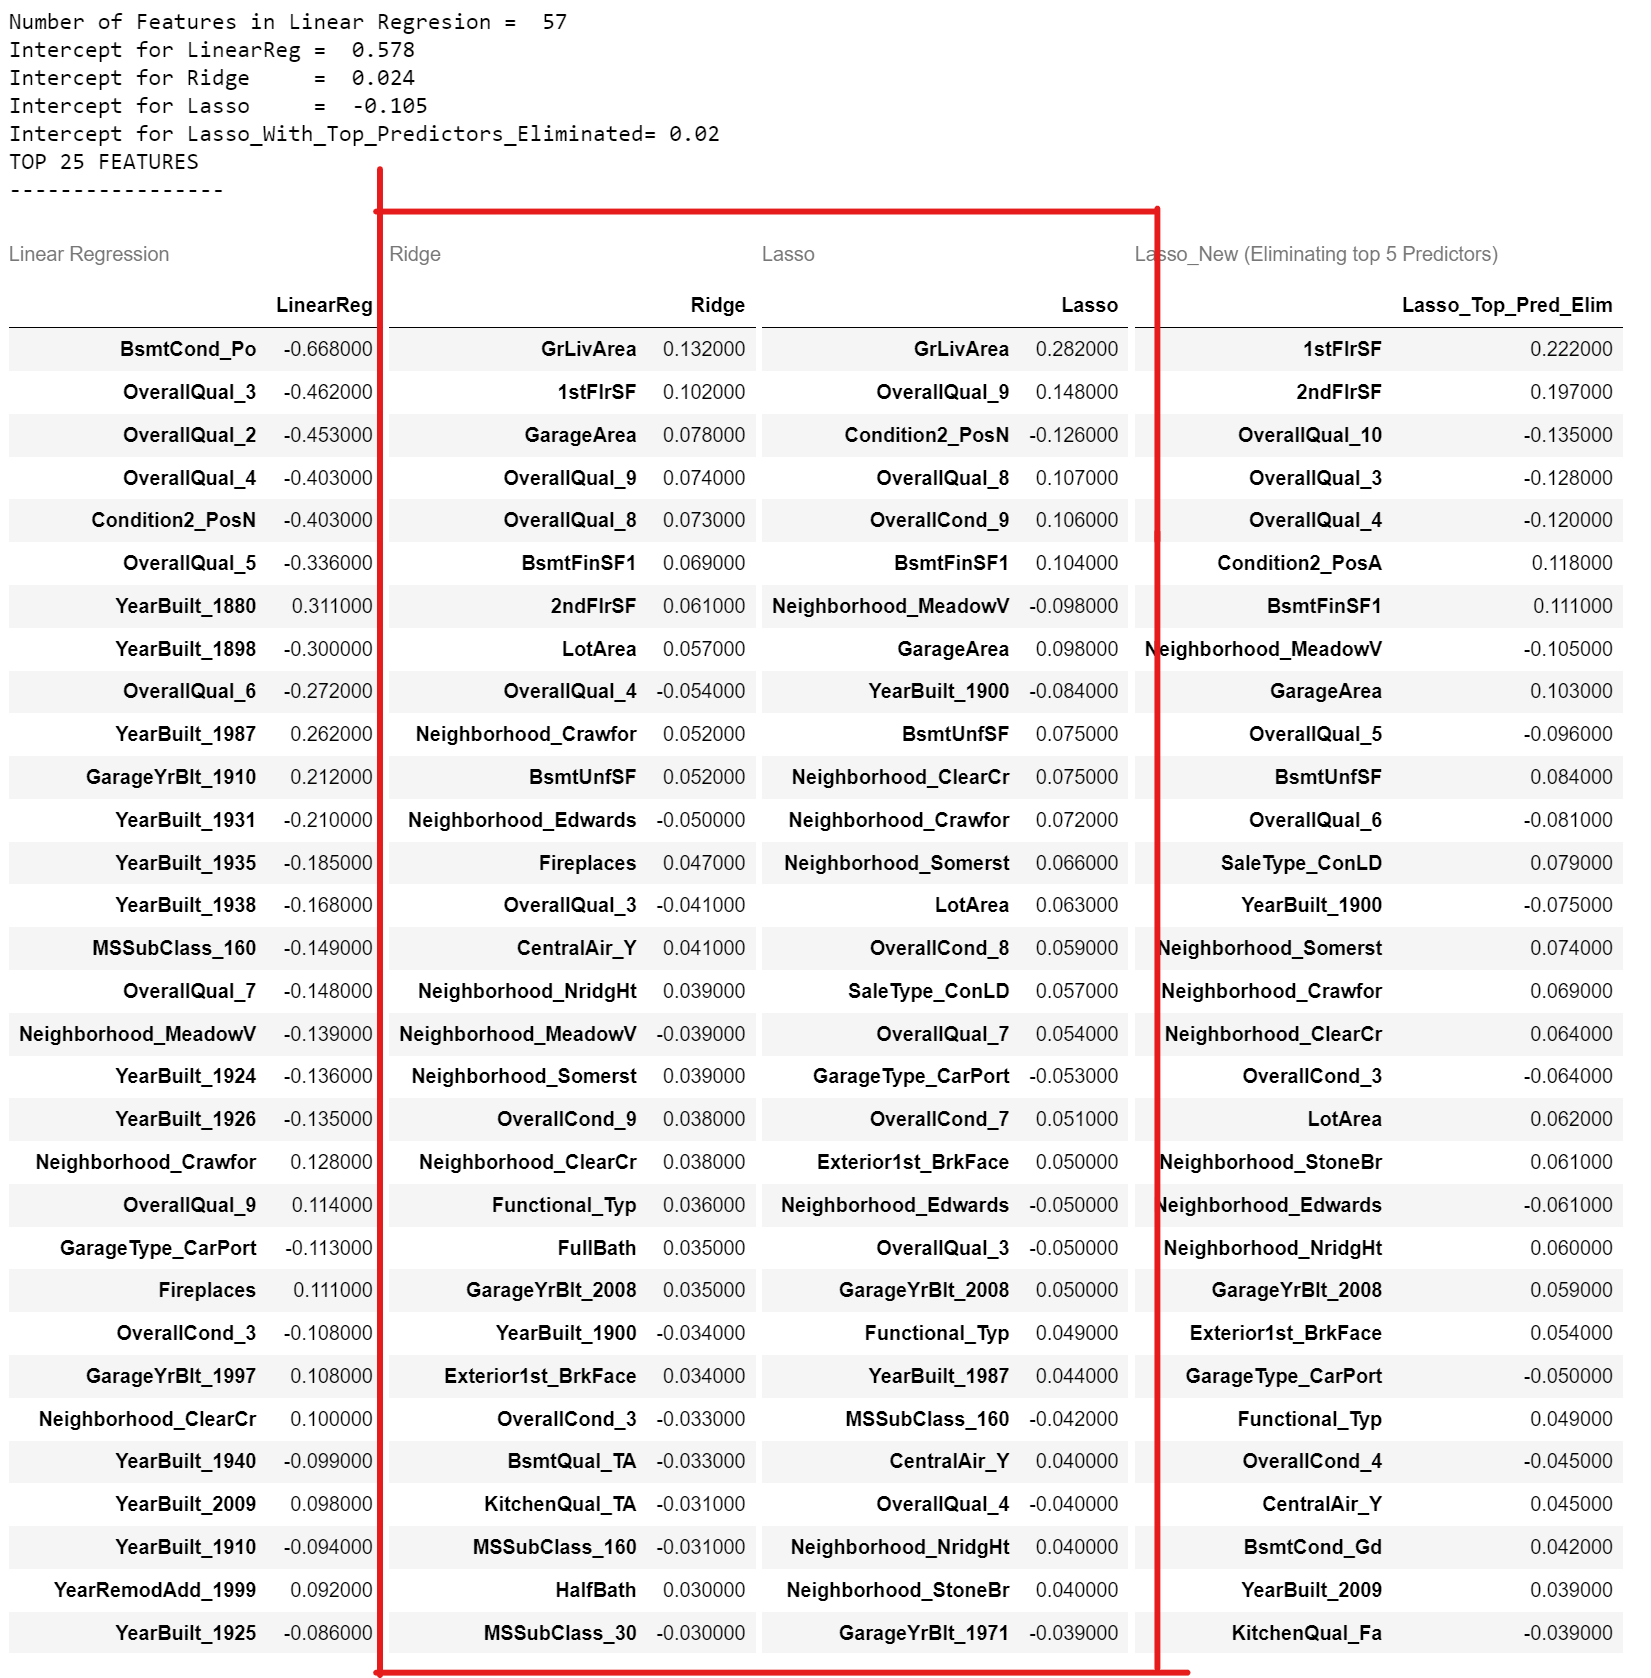


<div class="alert alert-block alert-danger">
<b><font size="4">Question 2:<font size="4"></b><font size="3.5"> You have determined the optimal value of lambda for ridge and lasso regression during the assignment. Now, which one will you choose to apply and why?</font>
</div>


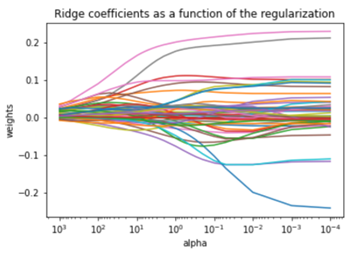

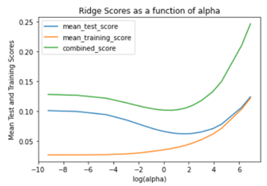

                    - Emergence of Coefficients with different values of alpha for Ridge Regression

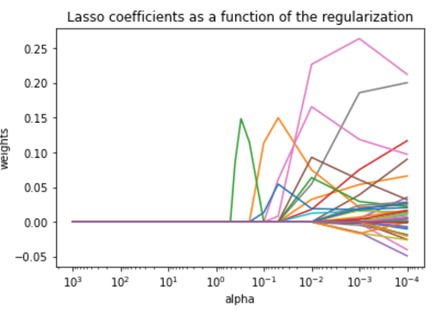

                    - Emergence of Coefficients with different values of alpha for Lasso Regression

#### Ridge Regression
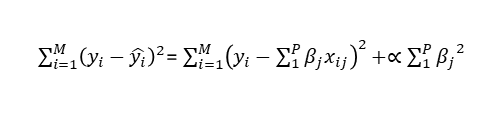
#### Lasso Regression
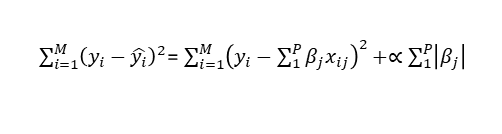


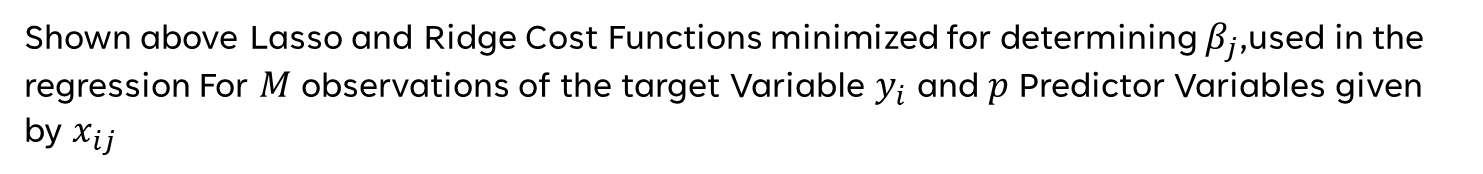

- In Ridge and Lasso the additional terms try to penalize the increase of coefficients by minimizing the joint term one of which is 𝛽_𝑗**2.The regularization term (lambda) regularizes the coefficients such that if the coefficients take large values the optimization function is penalized.By keeping the coefficient growth under check Ridge and Lasso Regression try to minimize the complexity of the model and prevent overfitting issues of linear regression.
- From the plots we can see how the coefficients start emerging  for Ridge and Lasso with decreasing alpha's. It can be seen that decreasing the alpha will start the emergence of coefficients at orders of magnitude higher for Ridge than that of Lasso and hence Ridge alphas are orders of magnitudes higher.
- The optimnal value of the alpha can be  chosen by the model in such a way that both  mean-test-scores for testing data and training data is minimized,while maximizing ther R2_scores.
- The difference between the Lasso and Ridge is that with the alpha increase for Ridge the coefficients starts shrinking towards zero but doesnt become zero where as in the Lasso the coefficients gets completely eliminated.Because of this the Lasso can lead to feature selection.
- The choice of the alpha and the model that we apply depends on the our business goal , in case we want to go for optimal feature selection's  while  making the model simpler then the Lasso is chosen, But if we want good accuracy with good  scores(R2,Mean-test/train scores) include higher number of features  without causing overfitting then we go for Ridge regression.However the complexity will increase as the dynamic range of the coefficients becomes higher for Ridge and it demands higher bits to for processing and storage.Lasso will be useful when there are millions of features  where ridge regression will lead to  significant complexity.
- Ridge generally works well even in presence of highly correlated features as it will include all features where coefficients gets decided based on the correlation between the features where as in Lasso highly correlated feartures are selected and remaining are set to zero.Also change in Model parameters for Lasso changes the top predictor variable as compared to ridge regression. So this also will be a factor for chosing the right model.






<div class="alert alert-block alert-danger">
<b><font size="4">Question 3:<font size="4"></b><font size="3.5"> After building the model, you realised that the five most important predictor variables in the lasso model are not available in the incoming data. You will now have to create another model excluding the five most important predictor variables. Which are the five most important predictor variables now?</font>
</div>


###### The top-5 Predictor Variabes with Lasso Regression 
- GrLivArea
- Condition2_PosN
- Condition2_PosA
- OverallQual_8
- OverallQual_9 

[Refer Model-1](#9.01)

###### The top-5 Predictor Variables obtained from Lasso regression after eliminating the above Variables
- YearBuilt_1893
- 1stFlrSF
- 2ndFlrSF
- OverallQual_10
- OverallQual_3



<div class="alert alert-block alert-danger">
<b><font size="4">Question 4:<font size="4"></b><font size="3.5"> How can you make sure that a model is robust and generalisable? What are the implications of the same for the accuracy of the model and why?
?</font>
</div>


- More robust model is the model which does not change its accuracy when the training data changes. 
- For a generalizable model it should not undergo changes when it sees a new data. Same model should fit properly to new, previously unseen data, assumed to be from the same distribution. To make the model more generalized and robust we must make the model simple. 
- When we try to make the model simple it suffers from bias as it does not perform well on the training data itself but when we try to make it complex it memorizes the data and suffers from overfitting, and it does not perform well on the test data and this variance of the model between training and test-data is termed as variance which is high for Complex models. 
- Striking the right balance between the bias and variance where the variance of the model can be reduced by trading off against the training error*(bias) will achieve an optimal model.
- The accuracy of the model on the training data is traded off in order to make it more robust and generalizable model for unseen data. This is achieved using Regularization techniques like Lasso and Ridge regression. 
- Regularization helps with managing the model complexity by essentially shrinking the model coefficients estimates to 0 (by adding a penalty term for increased coefficients) and discourages the model from becoming too complex and thus avoiding the risk of overfitting and essentially making it more robust and generalizable. 
- Regularization also takes care of Multicollinearity by reducing the coefficients of collinear variables close to zero. 
- Apart from this the data analysis and cleaning needs to be performed on training data by treatment of outliers and missing data with appropriate imputations, removal of unreliable features, removal of collinear features…etc to ensure the generation of a robust model
